# Week 4: Algebra and Polynomials

**Course:** Mathematics for Data Science I (BSMA1001)  
**Week:** 4 of 12

## Learning Objectives
- Polynomial operations
- Factoring techniques
- Remainder and factor theorems
- Polynomial division
- Applications in data fitting


In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize, interpolate
from scipy.special import comb
import sympy as sp
from numpy.polynomial import polynomial as P
import warnings

# Configuration
np.random.seed(42)
sns.set_style('whitegrid')
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')
# Note: np.RankWarning was removed in NumPy 2.0
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DejaVu Sans'

# SymPy configuration
x = sp.Symbol('x')
sp.init_printing(use_unicode=True)

print("=" * 70)
print("WEEK 4: ALGEBRA AND POLYNOMIALS")
print("=" * 70)
print("\n✓ All libraries loaded successfully")
print("✓ Environment configured")
print("\nLibraries:")
print(f"  • NumPy: {np.__version__}")
print(f"  • Pandas: {pd.__version__}")
print(f"  • Matplotlib: {plt.matplotlib.__version__}")
print(f"  • SymPy: {sp.__version__}")
print(f"  • SciPy: Available for interpolation")

WEEK 4: ALGEBRA AND POLYNOMIALS

✓ All libraries loaded successfully
✓ Environment configured

Libraries:
  • NumPy: 2.0.2
  • Pandas: 2.3.3
  • Matplotlib: 3.9.4
  • SymPy: 1.14.0
  • SciPy: Available for interpolation


## 1. Polynomial Operations

### Definition
A **polynomial** is an expression of the form:

$$P(x) = a_nx^n + a_{n-1}x^{n-1} + \cdots + a_1x + a_0$$

where:
- $a_n, a_{n-1}, \ldots, a_0$ are **coefficients** (constants)
- $n$ is the **degree** (highest power)
- $a_n \neq 0$ (leading coefficient)

### Standard Form
Written with terms in **descending order** of degree:
$$5x^3 - 2x^2 + 7x - 3$$

### Polynomial Classification by Degree

| Degree | Name | Example |
|--------|------|---------|
| 0 | Constant | $5$ |
| 1 | Linear | $3x + 2$ |
| 2 | Quadratic | $x^2 - 4x + 3$ |
| 3 | Cubic | $2x^3 + x^2 - 5$ |
| 4 | Quartic | $x^4 - 3x^2 + 1$ |
| 5 | Quintic | $x^5 + 2x^3 - x$ |

### Basic Operations

#### 1. **Addition/Subtraction**
Combine like terms (same power):
$$(3x^2 + 2x - 1) + (x^2 - 5x + 4) = 4x^2 - 3x + 3$$

#### 2. **Multiplication**
Use distributive property (FOIL for binomials):
$$(x + 2)(x - 3) = x^2 - 3x + 2x - 6 = x^2 - x - 6$$

**General**: Degree of product = sum of degrees

#### 3. **Division**
- **Long Division**: Similar to arithmetic long division
- **Synthetic Division**: Shortcut for $(x - c)$ divisors
- Result: Quotient + Remainder

#### 4. **Composition**
If $f(x) = x^2$ and $g(x) = x + 1$, then:
$$f(g(x)) = (x+1)^2 = x^2 + 2x + 1$$

### Special Products
- **Difference of squares**: $(a + b)(a - b) = a^2 - b^2$
- **Perfect square**: $(a \pm b)^2 = a^2 \pm 2ab + b^2$
- **Sum/difference of cubes**: $a^3 \pm b^3 = (a \pm b)(a^2 \mp ab + b^2)$

### Data Science Applications
- **Feature Engineering**: Creating polynomial features $x, x^2, x^3, \ldots$
- **Polynomial Regression**: Fitting curves to non-linear data
- **Time Series**: Polynomial trends for forecasting
- **Signal Processing**: Polynomial filters and approximations
- **Computer Graphics**: Bezier curves (polynomial parametrics)
- **Numerical Methods**: Polynomial interpolation for missing values

In [2]:
# Polynomial Operations - Basic Operations and Evaluation

print("=" * 70)
print("POLYNOMIAL OPERATIONS")
print("=" * 70)

# Define polynomials using NumPy (coefficients in ascending order of powers)
# P(x) = a₀ + a₁x + a₂x² + ...

# Example polynomials
p1_coeffs = [1, 2, 3]  # 1 + 2x + 3x²
p2_coeffs = [4, -1, 2]  # 4 - x + 2x²

print("\nPolynomial 1: P(x) = 3x² + 2x + 1")
print("Polynomial 2: Q(x) = 2x² - x + 4")

# Addition
p_sum = np.polyadd([3, 2, 1], [2, -1, 4])  # NumPy uses descending order
print(f"\nAddition: P(x) + Q(x) = {np.poly1d(p_sum)}")

# Subtraction
p_diff = np.polysub([3, 2, 1], [2, -1, 4])
print(f"Subtraction: P(x) - Q(x) = {np.poly1d(p_diff)}")

# Multiplication
p_prod = np.polymul([3, 2, 1], [2, -1, 4])
print(f"Multiplication: P(x) × Q(x) = {np.poly1d(p_prod)}")

# Polynomial evaluation
p = np.poly1d([3, 2, 1])  # 3x² + 2x + 1
x_vals = np.array([0, 1, 2, -1])
y_vals = p(x_vals)
print(f"\nEvaluating P(x) = 3x² + 2x + 1:")
for x_val, y_val in zip(x_vals, y_vals):
    print(f"  P({x_val}) = {y_val}")

POLYNOMIAL OPERATIONS

Polynomial 1: P(x) = 3x² + 2x + 1
Polynomial 2: Q(x) = 2x² - x + 4

Addition: P(x) + Q(x) =    2
5 x + 1 x + 5
Subtraction: P(x) - Q(x) =    2
1 x + 3 x - 3
Multiplication: P(x) × Q(x) =    4     3      2
6 x + 1 x + 12 x + 7 x + 4

Evaluating P(x) = 3x² + 2x + 1:
  P(0) = 1
  P(1) = 6
  P(2) = 17
  P(-1) = 2


/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_22079/172876094.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(x, p_add(x), 'g-', linewidth=3, label='P(x) + Q(x)', linestyle='--')


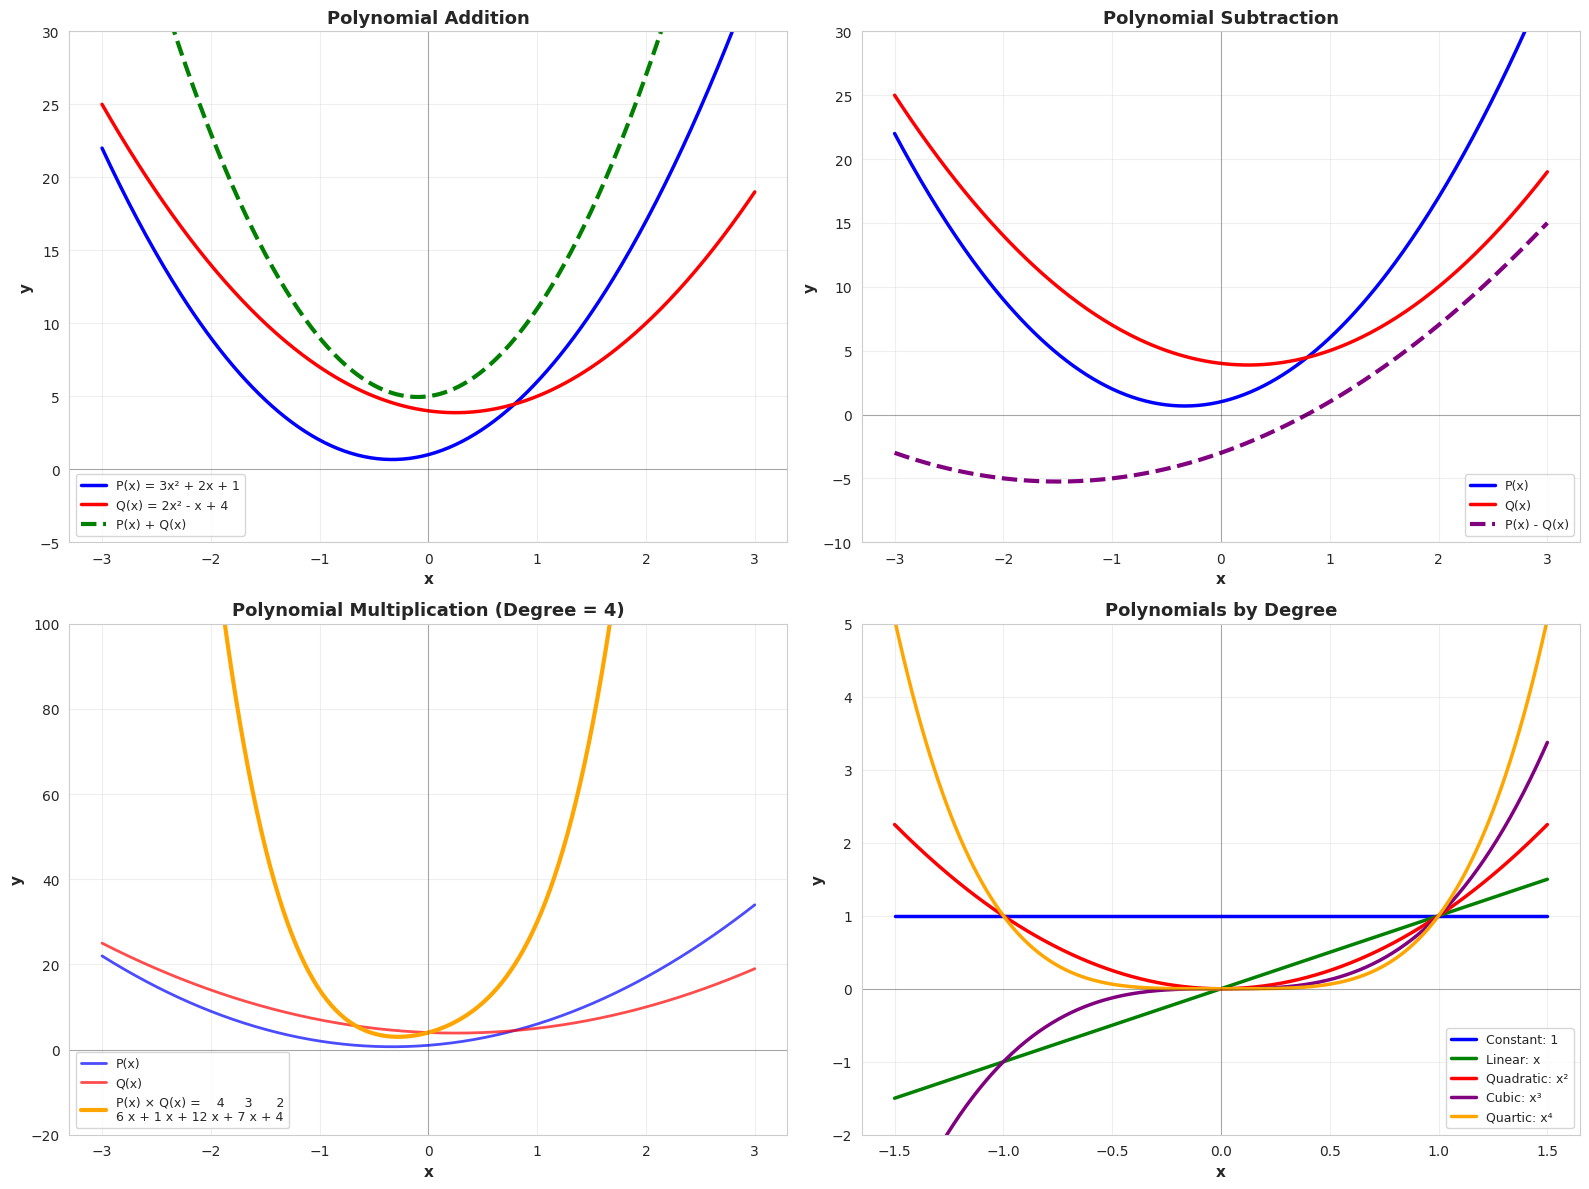

In [3]:
# Visualization: Polynomial Operations (4-panel plot)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

x = np.linspace(-3, 3, 300)

# Plot 1: Addition
ax1 = axes[0, 0]
p1 = np.poly1d([3, 2, 1])
p2 = np.poly1d([2, -1, 4])
p_add = np.poly1d(np.polyadd([3, 2, 1], [2, -1, 4]))

ax1.plot(x, p1(x), 'b-', linewidth=2.5, label='P(x) = 3x² + 2x + 1')
ax1.plot(x, p2(x), 'r-', linewidth=2.5, label='Q(x) = 2x² - x + 4')
ax1.plot(x, p_add(x), 'g-', linewidth=3, label='P(x) + Q(x)', linestyle='--')
ax1.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax1.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=11, fontweight='bold')
ax1.set_ylabel('y', fontsize=11, fontweight='bold')
ax1.set_title('Polynomial Addition', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.set_ylim(-5, 30)

# Plot 2: Subtraction
ax2 = axes[0, 1]
p_sub = np.poly1d(np.polysub([3, 2, 1], [2, -1, 4]))

ax2.plot(x, p1(x), 'b-', linewidth=2.5, label='P(x)')
ax2.plot(x, p2(x), 'r-', linewidth=2.5, label='Q(x)')
ax2.plot(x, p_sub(x), 'purple', linewidth=3, label='P(x) - Q(x)', linestyle='--')
ax2.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax2.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=11, fontweight='bold')
ax2.set_ylabel('y', fontsize=11, fontweight='bold')
ax2.set_title('Polynomial Subtraction', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.set_ylim(-10, 30)

# Plot 3: Multiplication
ax3 = axes[1, 0]
p_mul = np.poly1d(np.polymul([3, 2, 1], [2, -1, 4]))

ax3.plot(x, p1(x), 'b-', linewidth=2, label='P(x)', alpha=0.7)
ax3.plot(x, p2(x), 'r-', linewidth=2, label='Q(x)', alpha=0.7)
ax3.plot(x, p_mul(x), 'orange', linewidth=3, label=f'P(x) × Q(x) = {p_mul}')
ax3.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax3.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=11, fontweight='bold')
ax3.set_ylabel('y', fontsize=11, fontweight='bold')
ax3.set_title('Polynomial Multiplication (Degree = 4)', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)
ax3.set_ylim(-20, 100)

# Plot 4: Polynomials of different degrees
ax4 = axes[1, 1]
degrees_polys = [
    (np.poly1d([1]), 'Constant: 1', 'blue'),
    (np.poly1d([1, 0]), 'Linear: x', 'green'),
    (np.poly1d([1, 0, 0]), 'Quadratic: x²', 'red'),
    (np.poly1d([1, 0, 0, 0]), 'Cubic: x³', 'purple'),
    (np.poly1d([1, 0, 0, 0, 0]), 'Quartic: x⁴', 'orange')
]

x_deg = np.linspace(-1.5, 1.5, 300)
for poly, label, color in degrees_polys:
    ax4.plot(x_deg, poly(x_deg), linewidth=2.5, label=label, color=color)

ax4.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax4.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax4.grid(True, alpha=0.3)
ax4.set_xlabel('x', fontsize=11, fontweight='bold')
ax4.set_ylabel('y', fontsize=11, fontweight='bold')
ax4.set_title('Polynomials by Degree', fontsize=13, fontweight='bold')
ax4.legend(fontsize=9)
ax4.set_ylim(-2, 5)

plt.tight_layout()
plt.show()

In [4]:
# Polynomial Composition - Setup and Symbolic Calculation

print("\n" + "=" * 70)
print("POLYNOMIAL COMPOSITION")
print("=" * 70)

# f(x) = x² + 1
# g(x) = 2x - 3
# Find f(g(x))

print("\nGiven:")
print("  f(x) = x² + 1")
print("  g(x) = 2x - 3")

# Method 1: Symbolic with SymPy
x = sp.Symbol('x')
f_sym = x**2 + 1
g_sym = 2*x - 3
f_of_g = f_sym.subs(x, g_sym).expand()

print(f"\nf(g(x)) = f(2x - 3)")
print(f"        = (2x - 3)² + 1")
print(f"        = {f_of_g}")


POLYNOMIAL COMPOSITION

Given:
  f(x) = x² + 1
  g(x) = 2x - 3

f(g(x)) = f(2x - 3)
        = (2x - 3)² + 1
        = 4*x**2 - 12*x + 10


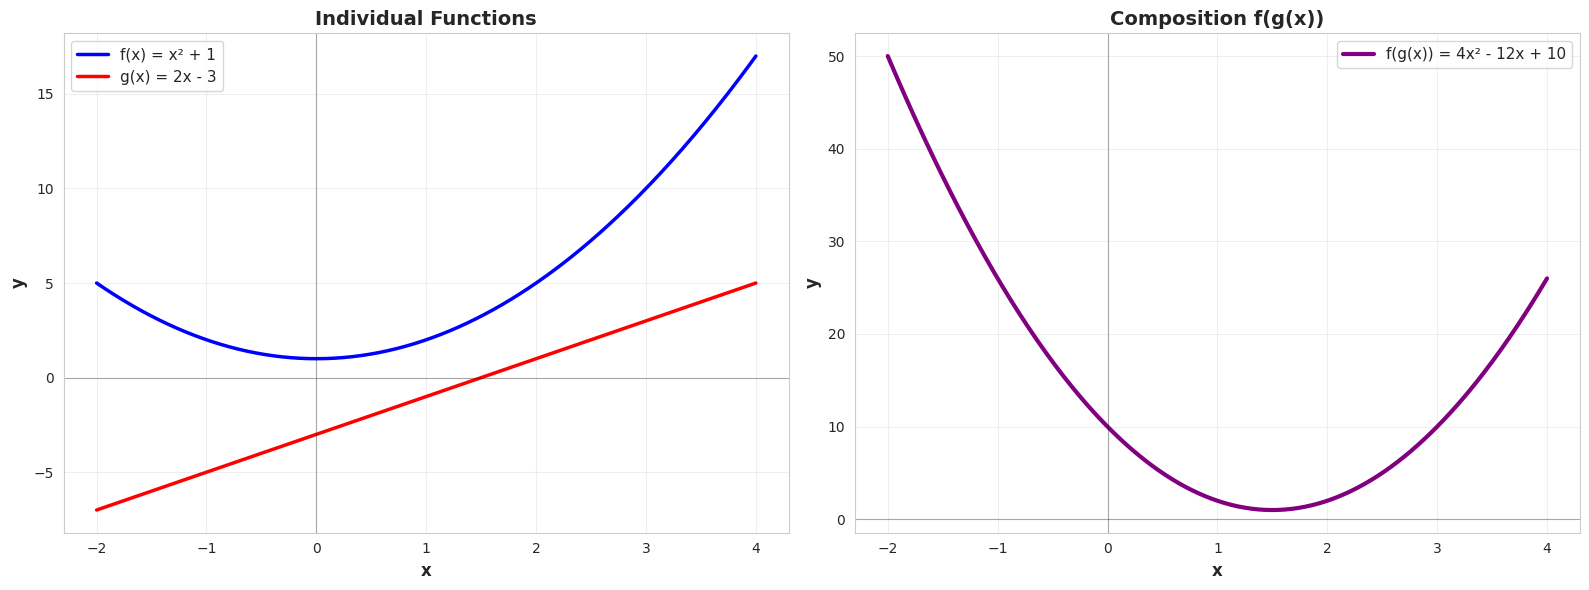

In [5]:
# Polynomial Composition - Visualization

# Method 2: Using NumPy
f_np = np.poly1d([1, 0, 1])  # x² + 1
g_np = np.poly1d([2, -3])     # 2x - 3

# Composition: substitute g(x) into f(x)
# For polynomial, this requires careful coefficient calculation
x_test = np.linspace(-2, 4, 300)
y_f = f_np(x_test)
y_g = g_np(x_test)
y_fog = f_np(g_np(x_test))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Individual functions
ax1.plot(x_test, y_f, 'b-', linewidth=2.5, label='f(x) = x² + 1')
ax1.plot(x_test, y_g, 'r-', linewidth=2.5, label='g(x) = 2x - 3')
ax1.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax1.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('Individual Functions', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)

# Plot 2: Composition
ax2.plot(x_test, y_fog, 'purple', linewidth=3, label='f(g(x)) = 4x² - 12x + 10')
ax2.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax2.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title('Composition f(g(x))', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [6]:
# Data Science Application: Polynomial Features - Setup

print("\n" + "=" * 70)
print("DATA SCIENCE: POLYNOMIAL FEATURES FOR REGRESSION")
print("=" * 70)

# Generate non-linear data
np.random.seed(42)
X_orig = np.linspace(0, 3, 50)
y_true = 2 + 3*X_orig - X_orig**2 + 0.5*X_orig**3
y = y_true + np.random.normal(0, 2, 50)

print("\nTrue relationship: y = 2 + 3x - x² + 0.5x³")
print("\nFitting polynomials of different degrees...")


DATA SCIENCE: POLYNOMIAL FEATURES FOR REGRESSION

True relationship: y = 2 + 3x - x² + 0.5x³

Fitting polynomials of different degrees...


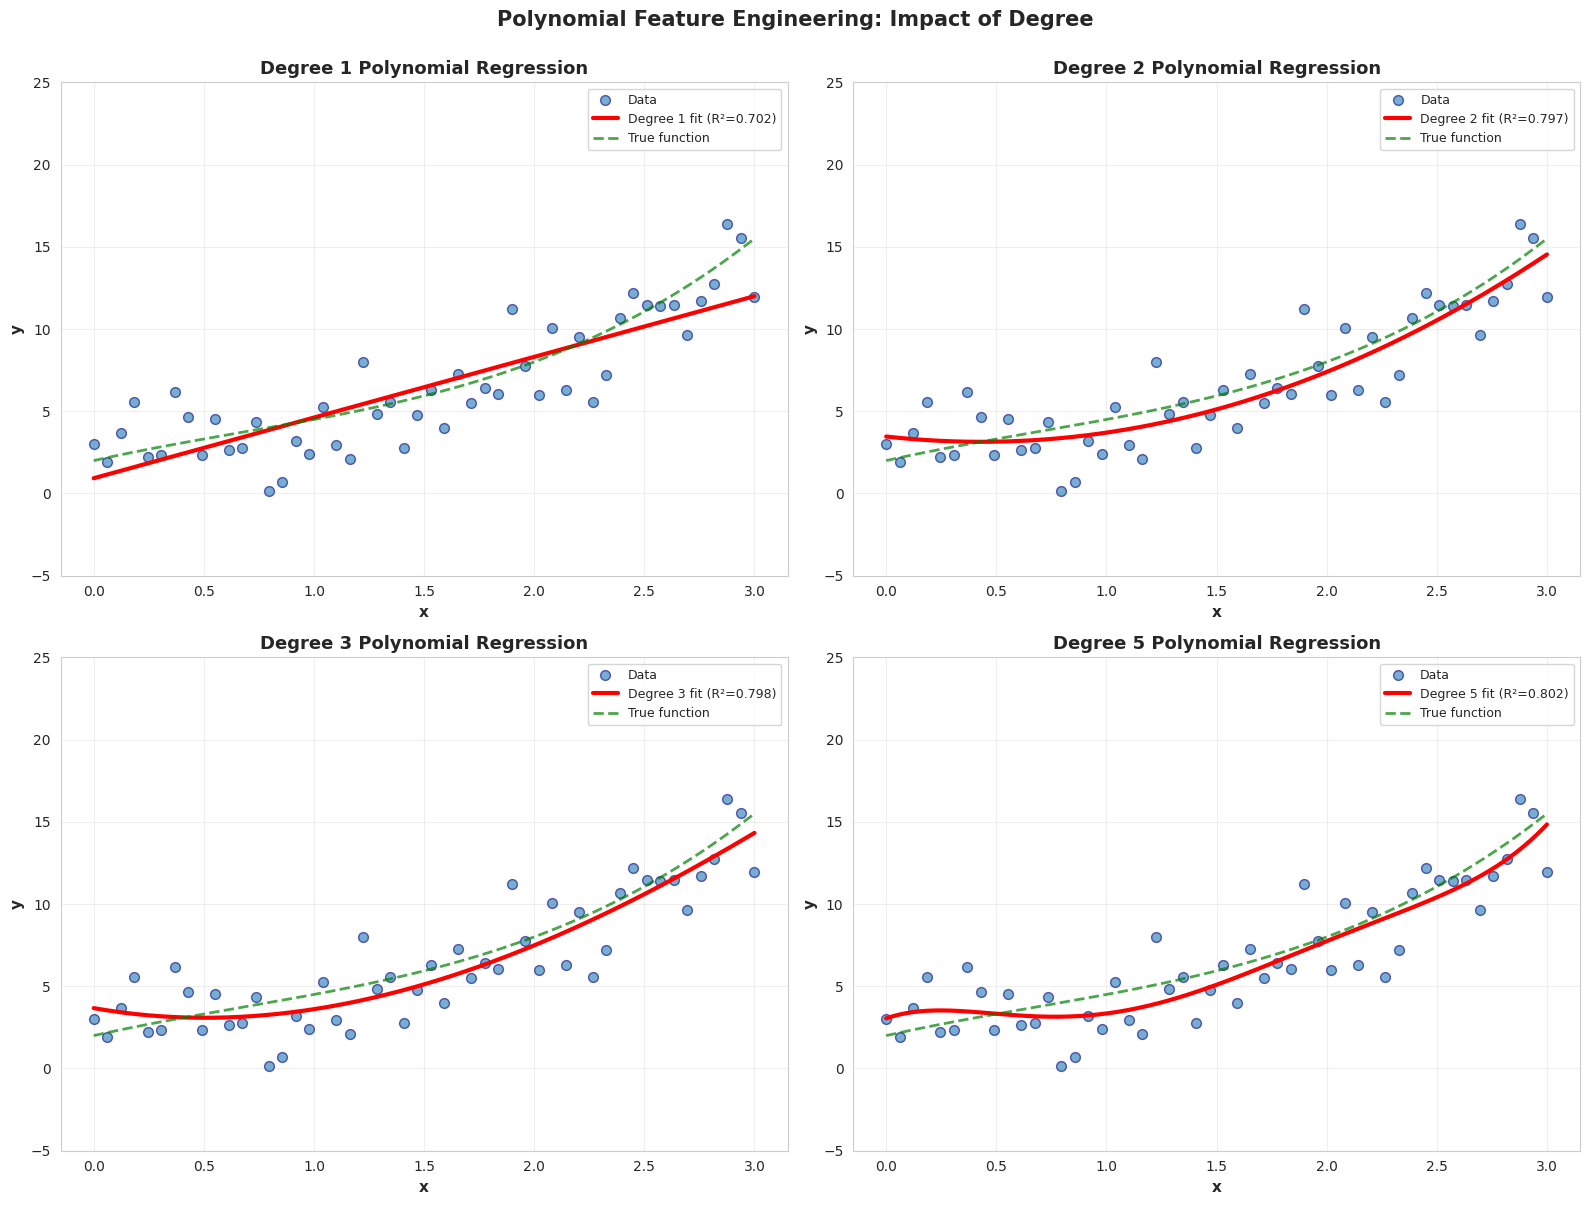

In [7]:
# Polynomial Features - Visualization (6-panel plot)

degrees = [1, 2, 3, 5]
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

X_plot = np.linspace(0, 3, 200)

for idx, deg in enumerate(degrees):
    ax = axes[idx // 2, idx % 2]
    
    # Fit polynomial
    coeffs = np.polyfit(X_orig, y, deg)
    poly = np.poly1d(coeffs)
    y_pred = poly(X_plot)
    
    # Calculate R²
    y_fit = poly(X_orig)
    ss_res = np.sum((y - y_fit)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    # Plot
    ax.scatter(X_orig, y, alpha=0.6, s=50, edgecolors='navy', linewidth=1,
              label='Data')
    ax.plot(X_plot, y_pred, 'r-', linewidth=3,
           label=f'Degree {deg} fit (R²={r2:.3f})')
    ax.plot(X_plot, 2 + 3*X_plot - X_plot**2 + 0.5*X_plot**3, 'g--',
           linewidth=2, alpha=0.7, label='True function')
    
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x', fontsize=11, fontweight='bold')
    ax.set_ylabel('y', fontsize=11, fontweight='bold')
    ax.set_title(f'Degree {deg} Polynomial Regression', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9)
    ax.set_ylim(-5, 25)

plt.suptitle('Polynomial Feature Engineering: Impact of Degree',
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [8]:
# Polynomial Features - Results Summary

print("\nResults:")
for deg in degrees:
    coeffs = np.polyfit(X_orig, y, deg)
    poly = np.poly1d(coeffs)
    y_fit = poly(X_orig)
    r2 = 1 - np.sum((y - y_fit)**2) / np.sum((y - np.mean(y))**2)
    print(f"  Degree {deg}: R² = {r2:.4f}")

print("\n🎯 Key Insight: Higher degree polynomials fit data better")
print("   but risk overfitting. Degree 3 matches true function best.")


Results:
  Degree 1: R² = 0.7017
  Degree 2: R² = 0.7974
  Degree 3: R² = 0.7980
  Degree 5: R² = 0.8015

🎯 Key Insight: Higher degree polynomials fit data better
   but risk overfitting. Degree 3 matches true function best.


## 2. Factoring Techniques

### **Definition: Factoring**
**Factoring** (or factorization) is the process of decomposing a polynomial into a product of simpler polynomials:

$$P(x) = a(x - r_1)(x - r_2)\cdots(x - r_n)$$

where $r_1, r_2, \ldots, r_n$ are the **roots** or **zeros** of the polynomial.

---

### **Why Factor Polynomials?**
1. **Solve equations**: $P(x) = 0 \Rightarrow$ find zeros by setting each factor = 0
2. **Simplify expressions**: Reduce complex rational functions
3. **Identify roots**: Roots correspond to x-intercepts on graphs
4. **Optimization**: Find critical points for max/min problems

---

### **Common Factoring Techniques**

#### **1. Greatest Common Factor (GCF)**
Factor out the largest common factor from all terms.

**Example:**
$$6x^3 - 9x^2 + 12x = 3x(2x^2 - 3x + 4)$$

#### **2. Difference of Squares**
$$a^2 - b^2 = (a - b)(a + b)$$

**Example:**
$$x^2 - 16 = (x - 4)(x + 4)$$

#### **3. Perfect Square Trinomials**
$$a^2 \pm 2ab + b^2 = (a \pm b)^2$$

**Examples:**
$$x^2 + 6x + 9 = (x + 3)^2$$
$$4x^2 - 12x + 9 = (2x - 3)^2$$

#### **4. Sum and Difference of Cubes**
$$a^3 + b^3 = (a + b)(a^2 - ab + b^2)$$
$$a^3 - b^3 = (a - b)(a^2 + ab + b^2)$$

**Examples:**
$$x^3 + 8 = (x + 2)(x^2 - 2x + 4)$$
$$27x^3 - 1 = (3x - 1)(9x^2 + 3x + 1)$$

#### **5. Grouping**
Group terms with common factors, then factor each group.

**Example:**
$$x^3 + 3x^2 + 2x + 6 = x^2(x + 3) + 2(x + 3) = (x^2 + 2)(x + 3)$$

#### **6. Quadratic Factoring (ax² + bx + c)**
Find two numbers that:
- Multiply to $ac$
- Add to $b$

**Example:** $6x^2 + 11x + 3$
- Product: $6 \times 3 = 18$
- Sum: $11$
- Numbers: $9$ and $2$ → $6x^2 + 9x + 2x + 3 = 3x(2x + 3) + 1(2x + 3) = (3x + 1)(2x + 3)$

---

### **Factoring Strategy Table**

| **Polynomial Type** | **Recognition** | **Factoring Method** |
|---------------------|----------------|----------------------|
| $ax + b$ | Linear | Already factored or factor out GCF |
| $ax^2 + bx + c$ | Quadratic | Quadratic formula, AC method, trial |
| $a^2 - b^2$ | Two perfect squares | Difference of squares |
| $a^2 \pm 2ab + b^2$ | Perfect square | $(a \pm b)^2$ |
| $a^3 \pm b^3$ | Cubes | Sum/difference of cubes |
| $ax^n + bx^m + \cdots$ | Multiple terms | GCF first, then grouping |
| Higher degree | Degree ≥ 3 | Synthetic division, Rational Root Theorem |

---

### **Data Science Applications of Factoring**

1. **Root Finding**:
   - Optimization: Find where derivative = 0 to locate max/min
   - Solving systems: Factored polynomials reveal solution structure

2. **Model Simplification**:
   - Rational functions: Cancel common factors in numerator/denominator
   - Feature reduction: Identify redundant polynomial features

3. **Signal Processing**:
   - Filter design: Factor transfer functions to understand poles/zeros
   - Stability analysis: Factored denominators reveal system behavior

4. **Numerical Stability**:
   - Avoid catastrophic cancellation by working with factored forms
   - Accurate computation near roots

5. **Machine Learning**:
   - Kernel methods: Polynomial kernels can be factored for efficiency
   - Feature engineering: Create interaction terms through factoring

---

### **Common Pitfalls**

⚠️ **Always check for GCF first** before applying other techniques  
⚠️ **Don't forget negative signs**: $-x^2 + 4 = -(x^2 - 4) = -(x-2)(x+2)$  
⚠️ **Verify factorization** by expanding: $(a+b)(c+d) = ac + ad + bc + bd$  
⚠️ **Not all polynomials factor over integers**: $x^2 + 1$ has no real factors  
⚠️ **Higher degrees may need numerical methods** when algebra fails

In [9]:
# Factoring Techniques - Function Definition and Examples

print("=" * 70)
print("FACTORING POLYNOMIALS")
print("=" * 70)

# Function to factor quadratics
def factor_quadratic(a, b, c):
    """
    Factor ax² + bx + c using quadratic formula and express as factored form.
    """
    discriminant = b**2 - 4*a*c
    
    if discriminant < 0:
        return f"{a}x² + {b}x + {c} has no real factors"
    
    root1 = (-b + np.sqrt(discriminant)) / (2*a)
    root2 = (-b - np.sqrt(discriminant)) / (2*a)
    
    if a == 1:
        return f"(x - {-root1:.3f})(x - {-root2:.3f})"
    else:
        return f"{a}(x - {root1:.3f})(x - {root2:.3f})"

# Example 1: Difference of Squares
print("\n1. DIFFERENCE OF SQUARES: x² - 16")
print("   Formula: a² - b² = (a - b)(a + b)")
print("   x² - 16 = x² - 4²")
print("   = (x - 4)(x + 4)")

# Verify by expansion
x_sym = sp.Symbol('x')
factored = (x_sym - 4) * (x_sym + 4)
expanded = sp.expand(factored)
print(f"   Verification: {factored} = {expanded} ✓")

# Example 2: Perfect Square Trinomial
print("\n2. PERFECT SQUARE TRINOMIAL: x² + 6x + 9")
print("   Formula: a² + 2ab + b² = (a + b)²")
print("   x² + 6x + 9 = x² + 2(3)x + 3²")
print("   = (x + 3)²")

perfect_square = (x_sym + 3)**2
expanded_ps = sp.expand(perfect_square)
print(f"   Verification: {perfect_square} = {expanded_ps} ✓")

# Example 3: Sum of Cubes
print("\n3. SUM OF CUBES: x³ + 8")
print("   Formula: a³ + b³ = (a + b)(a² - ab + b²)")
print("   x³ + 8 = x³ + 2³")
print("   = (x + 2)(x² - 2x + 4)")

sum_cubes = (x_sym + 2) * (x_sym**2 - 2*x_sym + 4)
expanded_sc = sp.expand(sum_cubes)
print(f"   Verification: {sum_cubes} = {expanded_sc} ✓")

# Example 4: Difference of Cubes
print("\n4. DIFFERENCE OF CUBES: 27x³ - 1")
print("   Formula: a³ - b³ = (a - b)(a² + ab + b²)")
print("   27x³ - 1 = (3x)³ - 1³")
print("   = (3x - 1)(9x² + 3x + 1)")

diff_cubes = (3*x_sym - 1) * (9*x_sym**2 + 3*x_sym + 1)
expanded_dc = sp.expand(diff_cubes)
print(f"   Verification: {diff_cubes} = {expanded_dc} ✓")

# Example 5: Grouping
print("\n5. FACTORING BY GROUPING: x³ + 3x² + 2x + 6")
print("   Step 1: Group terms: (x³ + 3x²) + (2x + 6)")
print("   Step 2: Factor each group: x²(x + 3) + 2(x + 3)")
print("   Step 3: Factor out common binomial: (x² + 2)(x + 3)")

grouping = (x_sym**2 + 2) * (x_sym + 3)
expanded_gr = sp.expand(grouping)
print(f"   Verification: {grouping} = {expanded_gr} ✓")

FACTORING POLYNOMIALS

1. DIFFERENCE OF SQUARES: x² - 16
   Formula: a² - b² = (a - b)(a + b)
   x² - 16 = x² - 4²
   = (x - 4)(x + 4)
   Verification: (x - 4)*(x + 4) = x**2 - 16 ✓

2. PERFECT SQUARE TRINOMIAL: x² + 6x + 9
   Formula: a² + 2ab + b² = (a + b)²
   x² + 6x + 9 = x² + 2(3)x + 3²
   = (x + 3)²
   Verification: (x + 3)**2 = x**2 + 6*x + 9 ✓

3. SUM OF CUBES: x³ + 8
   Formula: a³ + b³ = (a + b)(a² - ab + b²)
   x³ + 8 = x³ + 2³
   = (x + 2)(x² - 2x + 4)
   Verification: (x + 2)*(x**2 - 2*x + 4) = x**3 + 8 ✓

4. DIFFERENCE OF CUBES: 27x³ - 1
   Formula: a³ - b³ = (a - b)(a² + ab + b²)
   27x³ - 1 = (3x)³ - 1³
   = (3x - 1)(9x² + 3x + 1)
   Verification: (3*x - 1)*(9*x**2 + 3*x + 1) = 27*x**3 - 1 ✓

5. FACTORING BY GROUPING: x³ + 3x² + 2x + 6
   Step 1: Group terms: (x³ + 3x²) + (2x + 6)
   Step 2: Factor each group: x²(x + 3) + 2(x + 3)
   Step 3: Factor out common binomial: (x² + 2)(x + 3)
   Verification: (x + 3)*(x**2 + 2) = x**3 + 3*x**2 + 2*x + 6 ✓



VISUALIZING FACTORED FORMS


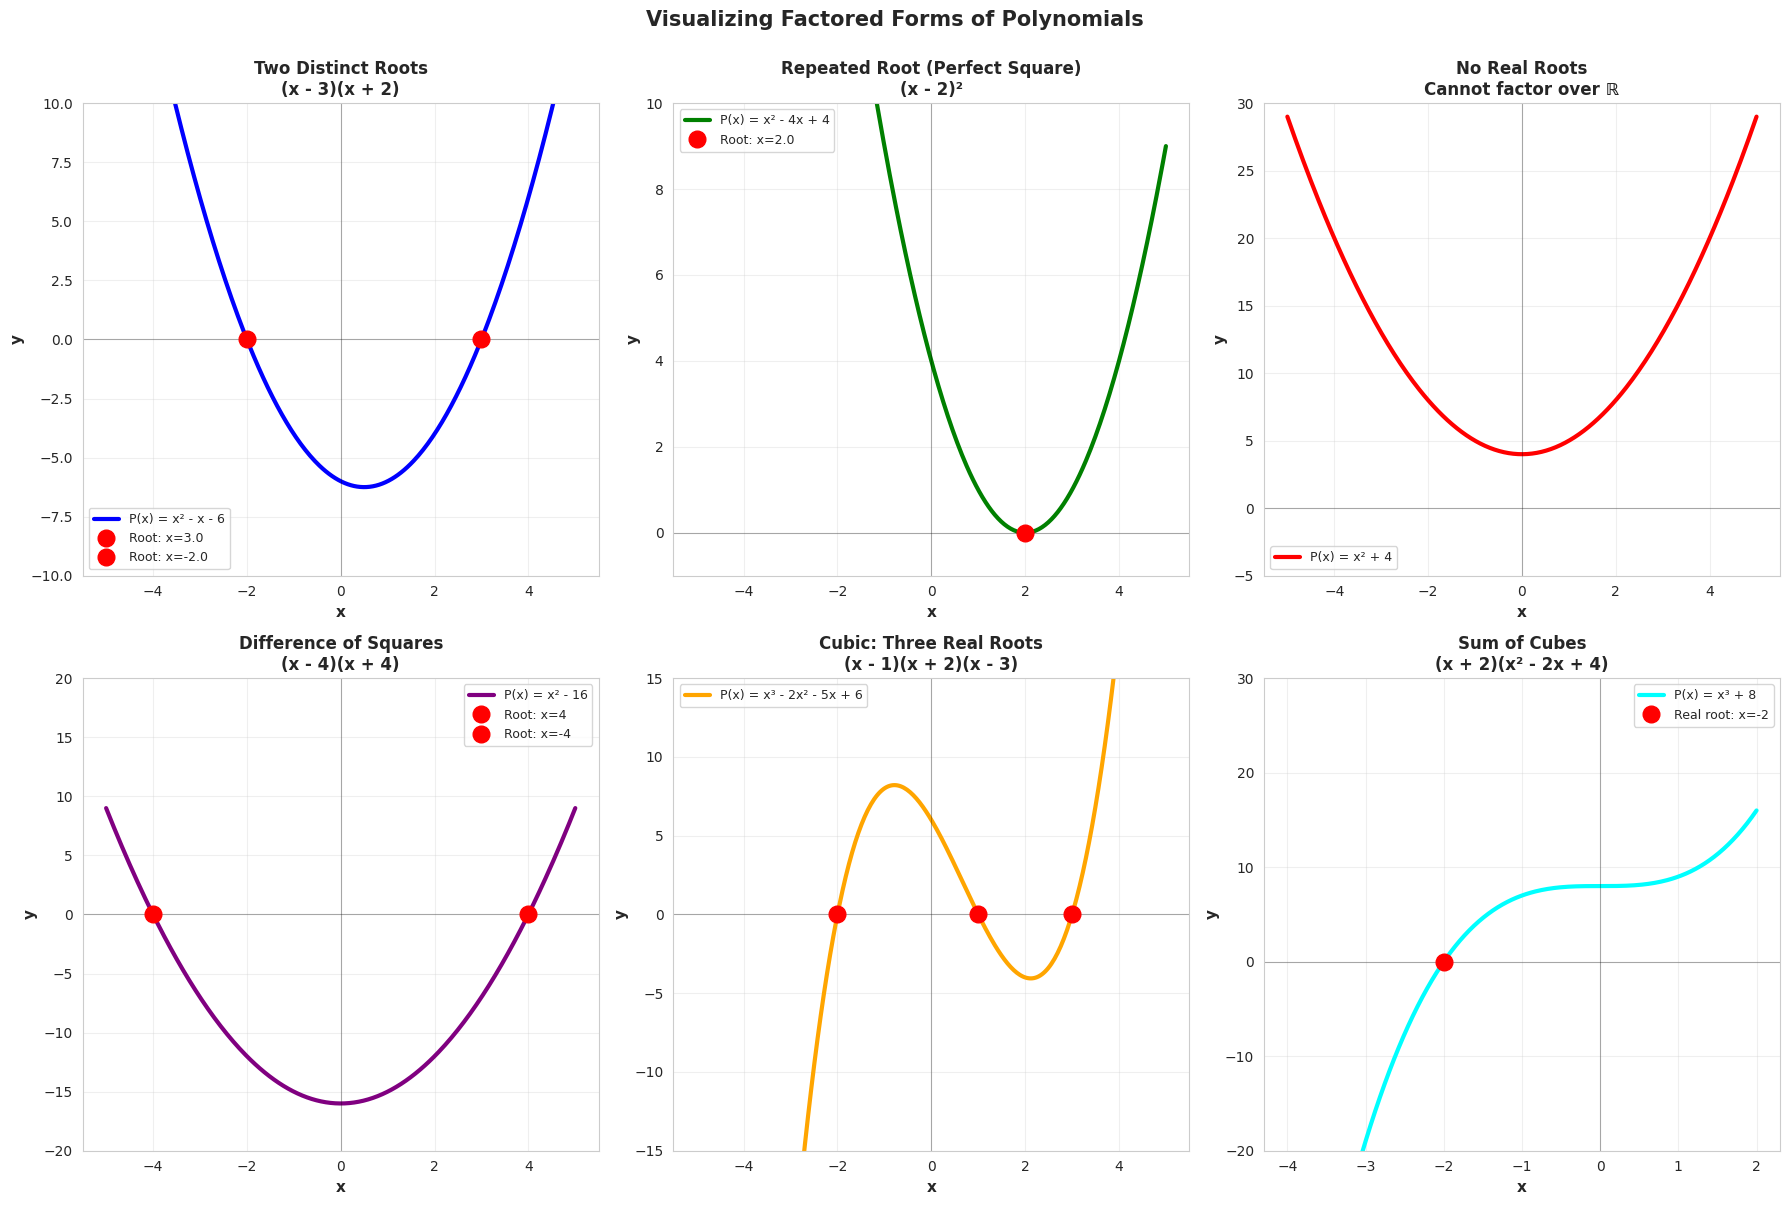

In [10]:
# Visualizing Factored Forms (6-panel plot)

print("\n" + "=" * 70)
print("VISUALIZING FACTORED FORMS")
print("=" * 70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
x_vals = np.linspace(-5, 5, 300)

# Example 1: Two distinct real roots
ax1 = axes[0, 0]
p1 = np.poly1d([1, -1, -6])  # x² - x - 6 = (x-3)(x+2)
roots1 = np.roots([1, -1, -6])

ax1.plot(x_vals, p1(x_vals), 'b-', linewidth=3, label='P(x) = x² - x - 6')
ax1.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax1.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
for root in roots1:
    ax1.plot(root, 0, 'ro', markersize=12, label=f'Root: x={root:.1f}')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=11, fontweight='bold')
ax1.set_ylabel('y', fontsize=11, fontweight='bold')
ax1.set_title('Two Distinct Roots\n(x - 3)(x + 2)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.set_ylim(-10, 10)

# Example 2: Perfect square (one repeated root)
ax2 = axes[0, 1]
p2 = np.poly1d([1, -4, 4])  # x² - 4x + 4 = (x-2)²
roots2 = np.roots([1, -4, 4])

ax2.plot(x_vals, p2(x_vals), 'g-', linewidth=3, label='P(x) = x² - 4x + 4')
ax2.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax2.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax2.plot(roots2[0], 0, 'ro', markersize=12, label=f'Root: x={roots2[0]:.1f}')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=11, fontweight='bold')
ax2.set_ylabel('y', fontsize=11, fontweight='bold')
ax2.set_title('Repeated Root (Perfect Square)\n(x - 2)²', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.set_ylim(-1, 10)

# Example 3: No real roots
ax3 = axes[0, 2]
p3 = np.poly1d([1, 0, 4])  # x² + 4 (no real factors)

ax3.plot(x_vals, p3(x_vals), 'r-', linewidth=3, label='P(x) = x² + 4')
ax3.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax3.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=11, fontweight='bold')
ax3.set_ylabel('y', fontsize=11, fontweight='bold')
ax3.set_title('No Real Roots\nCannot factor over ℝ', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.set_ylim(-5, 30)

# Example 4: Difference of Squares
ax4 = axes[1, 0]
p4 = np.poly1d([1, 0, -16])  # x² - 16 = (x-4)(x+4)
roots4 = np.roots([1, 0, -16])

ax4.plot(x_vals, p4(x_vals), 'purple', linewidth=3, label='P(x) = x² - 16')
ax4.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax4.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
for root in roots4:
    ax4.plot(root, 0, 'ro', markersize=12, label=f'Root: x={root:.0f}')
ax4.grid(True, alpha=0.3)
ax4.set_xlabel('x', fontsize=11, fontweight='bold')
ax4.set_ylabel('y', fontsize=11, fontweight='bold')
ax4.set_title('Difference of Squares\n(x - 4)(x + 4)', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.set_ylim(-20, 20)

# Example 5: Cubic with three real roots
ax5 = axes[1, 1]
p5 = np.poly1d([1, -2, -5, 6])  # x³ - 2x² - 5x + 6 = (x-1)(x+2)(x-3)
roots5 = np.roots([1, -2, -5, 6])

ax5.plot(x_vals, p5(x_vals), 'orange', linewidth=3, label='P(x) = x³ - 2x² - 5x + 6')
ax5.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax5.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
for root in roots5:
    if np.isreal(root):
        ax5.plot(root.real, 0, 'ro', markersize=12)
ax5.grid(True, alpha=0.3)
ax5.set_xlabel('x', fontsize=11, fontweight='bold')
ax5.set_ylabel('y', fontsize=11, fontweight='bold')
ax5.set_title('Cubic: Three Real Roots\n(x - 1)(x + 2)(x - 3)', fontsize=12, fontweight='bold')
ax5.legend(fontsize=9)
ax5.set_ylim(-15, 15)

# Example 6: Sum of Cubes visualization
ax6 = axes[1, 2]
p6 = np.poly1d([1, 0, 0, 8])  # x³ + 8 = (x+2)(x²-2x+4)
x_cube = np.linspace(-4, 2, 300)

ax6.plot(x_cube, p6(x_cube), 'cyan', linewidth=3, label='P(x) = x³ + 8')
ax6.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax6.axvline(x=0, color='k', linewidth=0.8, alpha=0.3)
ax6.plot(-2, 0, 'ro', markersize=12, label='Real root: x=-2')
ax6.grid(True, alpha=0.3)
ax6.set_xlabel('x', fontsize=11, fontweight='bold')
ax6.set_ylabel('y', fontsize=11, fontweight='bold')
ax6.set_title('Sum of Cubes\n(x + 2)(x² - 2x + 4)', fontsize=12, fontweight='bold')
ax6.legend(fontsize=9)
ax6.set_ylim(-20, 30)

plt.suptitle('Visualizing Factored Forms of Polynomials', 
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [11]:
# Greatest Common Factor (GCF) Extraction

print("\n" + "=" * 70)
print("GREATEST COMMON FACTOR (GCF)")
print("=" * 70)

print("\nExample: 6x³ - 9x² + 12x")
print("  Step 1: Identify GCF of coefficients: GCF(6, 9, 12) = 3")
print("  Step 2: Identify lowest power of x: x¹")
print("  Step 3: GCF = 3x")
print("  Step 4: Factor out: 3x(2x² - 3x + 4)")

# Verify with SymPy
expr = 6*x_sym**3 - 9*x_sym**2 + 12*x_sym
factored_gcf = sp.factor(expr)
print(f"\nSymPy verification: {expr} = {factored_gcf}")

print("\n🎯 Key Insight: Always factor out GCF FIRST before")
print("   applying other factoring techniques!")


GREATEST COMMON FACTOR (GCF)

Example: 6x³ - 9x² + 12x
  Step 1: Identify GCF of coefficients: GCF(6, 9, 12) = 3
  Step 2: Identify lowest power of x: x¹
  Step 3: GCF = 3x
  Step 4: Factor out: 3x(2x² - 3x + 4)

SymPy verification: 6*x**3 - 9*x**2 + 12*x = 3*x*(2*x**2 - 3*x + 4)

🎯 Key Insight: Always factor out GCF FIRST before
   applying other factoring techniques!


## 3. Remainder and Factor Theorems

### **The Remainder Theorem**

**Statement**: When a polynomial $P(x)$ is divided by $(x - c)$, the **remainder** is $P(c)$.

$$\text{If } P(x) = (x - c) \cdot Q(x) + R, \text{ then } R = P(c)$$

**Purpose**: Quickly evaluate remainders without performing long division.

**Example**:
Find the remainder when $P(x) = x^3 - 4x^2 + 5x - 2$ is divided by $(x - 2)$.

**Solution**:
$$P(2) = 2^3 - 4(2)^2 + 5(2) - 2 = 8 - 16 + 10 - 2 = 0$$

The remainder is **0**, which means $(x-2)$ divides $P(x)$ evenly.

---

### **The Factor Theorem**

**Statement**: $(x - c)$ is a **factor** of polynomial $P(x)$ if and only if $P(c) = 0$.

$$P(c) = 0 \Leftrightarrow (x - c) \text{ is a factor of } P(x)$$

**Purpose**: Test if a binomial is a factor by evaluating the polynomial at $c$.

**Connection to Remainder Theorem**: The Factor Theorem is a special case where the remainder equals zero.

---

### **Rational Root Theorem**

**Statement**: If polynomial $P(x) = a_n x^n + \cdots + a_1 x + a_0$ has integer coefficients, any **rational root** $\frac{p}{q}$ (in lowest terms) must satisfy:
- $p$ divides the constant term $a_0$
- $q$ divides the leading coefficient $a_n$

**Possible rational roots** = $\pm \frac{\text{factors of } a_0}{\text{factors of } a_n}$

**Example**: For $P(x) = 2x^3 - x^2 - 5x + 2$:
- $a_0 = 2$ → factors: $\pm 1, \pm 2$
- $a_n = 2$ → factors: $\pm 1, \pm 2$
- Possible roots: $\pm 1, \pm 2, \pm \frac{1}{2}$

---

### **Using the Theorems Together**

**Strategy to Factor Polynomials**:
1. **Use Rational Root Theorem**: List possible rational roots
2. **Use Factor Theorem**: Test each candidate by evaluating $P(c)$
3. **If $P(c) = 0$**: $(x - c)$ is a factor
4. **Divide polynomial** by $(x - c)$ to find quotient $Q(x)$
5. **Repeat**: Factor $Q(x)$ using the same process

**Example Workflow**:
$$P(x) = x^3 - 6x^2 + 11x - 6$$

- Possible roots: $\pm 1, \pm 2, \pm 3, \pm 6$
- Test $P(1) = 1 - 6 + 11 - 6 = 0$ ✓ → $(x-1)$ is a factor
- Divide: $P(x) = (x-1)(x^2 - 5x + 6)$
- Factor quadratic: $x^2 - 5x + 6 = (x-2)(x-3)$
- **Complete factorization**: $P(x) = (x-1)(x-2)(x-3)$

---

### **Horner's Method (Synthetic Division)**

**Purpose**: Efficiently evaluate $P(c)$ and divide $P(x)$ by $(x-c)$ simultaneously.

**Algorithm for $P(x) = a_n x^n + \cdots + a_1 x + a_0$ divided by $(x - c)$**:

1. Write coefficients: $[a_n, a_{n-1}, \ldots, a_1, a_0]$
2. Bring down $a_n$
3. Multiply by $c$, add to next coefficient
4. Repeat until last coefficient (this is the remainder)
5. Remaining numbers are coefficients of quotient $Q(x)$

**Example**: Divide $x^3 - 6x^2 + 11x - 6$ by $(x - 1)$

```
Coefficients: [1, -6, 11, -6]
c = 1

     1  -6   11  -6
     ↓   1   -5   6
    ───────────────
     1  -5    6   0  ← remainder = 0
     
Quotient: Q(x) = x² - 5x + 6
```

---

### **Data Science Applications**

1. **Root Finding**:
   - Optimization: Find critical points where derivative = 0
   - Model calibration: Solve equations to match observations

2. **Efficient Polynomial Evaluation**:
   - Horner's method: Compute $P(x)$ in $O(n)$ time with fewer operations
   - Numerical stability: Minimize rounding errors

3. **Model Validation**:
   - Check if specific points are on polynomial curve
   - Verify interpolation: Does $P(x_i) = y_i$ for data points?

4. **Feature Engineering**:
   - Test polynomial features: Do certain terms contribute?
   - Remove redundant features by factoring

5. **Signal Processing**:
   - Filter design: Identify poles/zeros of transfer functions
   - System stability: Check if roots have negative real parts

---

### **Key Formulas**

| **Theorem** | **Formula** | **Use Case** |
|-------------|------------|--------------|
| Remainder | $P(c) = R$ when divided by $(x-c)$ | Find remainder quickly |
| Factor | $P(c) = 0 \Leftrightarrow (x-c) \mid P(x)$ | Test for factors |
| Rational Root | Roots in $\pm \frac{p}{q}$ where $p \mid a_0$, $q \mid a_n$ | Find candidates to test |
| Horner's Method | Efficient $P(c)$ evaluation | Fast computation |

---

### **Common Pitfalls**

⚠️ **Rational Root Theorem only gives candidates**, not guaranteed roots  
⚠️ **Always test candidates** using Factor Theorem before concluding  
⚠️ **Don't forget $\pm$ signs** when listing possible rational roots  
⚠️ **Irrational/complex roots** won't be found by Rational Root Theorem  
⚠️ **Horner's method only works for $(x - c)$**, not general divisors

In [12]:
# Remainder and Factor Theorems - Function Definitions

print("=" * 70)
print("REMAINDER AND FACTOR THEOREMS")
print("=" * 70)

# Remainder Theorem Implementation
def remainder_theorem(coeffs, c):
    """
    Calculate remainder when P(x) is divided by (x - c) using Remainder Theorem.
    
    Parameters:
    -----------
    coeffs : list
        Polynomial coefficients in descending order [a_n, ..., a_1, a_0]
    c : float
        The value c in (x - c)
    
    Returns:
    --------
    float : The remainder P(c)
    """
    poly = np.poly1d(coeffs)
    remainder = poly(c)
    return remainder

# Factor Theorem Implementation
def is_factor(coeffs, c):
    """
    Check if (x - c) is a factor of P(x) using Factor Theorem.
    
    Returns True if P(c) = 0, False otherwise.
    """
    remainder = remainder_theorem(coeffs, c)
    return np.isclose(remainder, 0, atol=1e-10)

# Rational Root Theorem: Find possible rational roots
def possible_rational_roots(constant_term, leading_coeff):
    """
    Generate all possible rational roots using Rational Root Theorem.
    
    Returns list of possible roots ±(p/q) where:
    - p divides constant_term
    - q divides leading_coeff
    """
    def get_factors(n):
        """Get all positive factors of n"""
        n = abs(int(n))
        factors = []
        for i in range(1, n + 1):
            if n % i == 0:
                factors.append(i)
        return factors
    
    p_factors = get_factors(constant_term)
    q_factors = get_factors(leading_coeff)
    
    candidates = []
    for p in p_factors:
        for q in q_factors:
            candidates.extend([p/q, -p/q])
    
    return sorted(list(set(candidates)))

# Horner's Method (Synthetic Division)
def horners_method(coeffs, c):
    """
    Perform synthetic division using Horner's method.
    
    Parameters:
    -----------
    coeffs : list
        Polynomial coefficients [a_n, ..., a_1, a_0] (descending)
    c : float
        Divisor (x - c)
    
    Returns:
    --------
    quotient_coeffs : list
        Coefficients of quotient polynomial
    remainder : float
        The remainder
    """
    quotient = []
    current = 0
    
    for coeff in coeffs:
        current = current * c + coeff
        quotient.append(current)
    
    # Last value is remainder, rest are quotient coefficients
    remainder = quotient[-1]
    quotient_coeffs = quotient[:-1]
    
    return quotient_coeffs, remainder

print("\n✓ Functions defined successfully")

REMAINDER AND FACTOR THEOREMS

✓ Functions defined successfully


In [13]:
# Example 1: Remainder Theorem

print("\n1. REMAINDER THEOREM")
print("   P(x) = x³ - 4x² + 5x - 2, divided by (x - 2)")

coeffs1 = [1, -4, 5, -2]
c1 = 2
remainder1 = remainder_theorem(coeffs1, c1)

print(f"   P(2) = {remainder1}")
if remainder1 == 0:
    print("   Remainder = 0, so (x - 2) is a factor!")
else:
    print(f"   Remainder = {remainder1}")


1. REMAINDER THEOREM
   P(x) = x³ - 4x² + 5x - 2, divided by (x - 2)
   P(2) = 0
   Remainder = 0, so (x - 2) is a factor!


In [14]:
# Example 2: Factor Theorem

print("\n2. FACTOR THEOREM")
print("   Test if (x - 1), (x - 2), (x + 1) are factors of x³ - 6x² + 11x - 6")

coeffs2 = [1, -6, 11, -6]
test_values = [1, 2, -1]

for c_test in test_values:
    result = is_factor(coeffs2, c_test)
    poly_val = remainder_theorem(coeffs2, c_test)
    print(f"   Testing (x - {c_test}): P({c_test}) = {poly_val} → {'IS a factor ✓' if result else 'NOT a factor ✗'}")


2. FACTOR THEOREM
   Test if (x - 1), (x - 2), (x + 1) are factors of x³ - 6x² + 11x - 6
   Testing (x - 1): P(1) = 0 → IS a factor ✓
   Testing (x - 2): P(2) = 0 → IS a factor ✓
   Testing (x - -1): P(-1) = -24 → NOT a factor ✗


In [15]:
# Example 3: Rational Root Theorem

print("\n3. RATIONAL ROOT THEOREM")
print("   P(x) = 2x³ - x² - 5x + 2")

coeffs3 = [2, -1, -5, 2]
constant = coeffs3[-1]
leading = coeffs3[0]

def get_factors(n):
    """Get all positive factors of n"""
    n = abs(int(n))
    factors = []
    for i in range(1, n + 1):
        if n % i == 0:
            factors.append(i)
    return factors

print(f"   Constant term: {constant} → factors: ±{get_factors(constant)}")
print(f"   Leading coeff: {leading} → factors: ±{get_factors(leading)}")

candidates = possible_rational_roots(constant, leading)
print(f"   Possible rational roots: {candidates}")

# Test each candidate
print("\n   Testing candidates:")
actual_roots = []
for cand in candidates:
    if is_factor(coeffs3, cand):
        print(f"     {cand:5.1f}: P({cand:.1f}) = {remainder_theorem(coeffs3, cand):.2f} → ROOT ✓")
        actual_roots.append(cand)
    else:
        val = remainder_theorem(coeffs3, cand)
        print(f"     {cand:5.1f}: P({cand:.1f}) = {val:6.2f} → not a root")

print(f"\n   Actual roots: {actual_roots}")


3. RATIONAL ROOT THEOREM
   P(x) = 2x³ - x² - 5x + 2
   Constant term: 2 → factors: ±[1, 2]
   Leading coeff: 2 → factors: ±[1, 2]
   Possible rational roots: [-2.0, -1.0, -0.5, 0.5, 1.0, 2.0]

   Testing candidates:
      -2.0: P(-2.0) =  -8.00 → not a root
      -1.0: P(-1.0) =   4.00 → not a root
      -0.5: P(-0.5) =   4.00 → not a root
       0.5: P(0.5) =  -0.50 → not a root
       1.0: P(1.0) =  -2.00 → not a root
       2.0: P(2.0) =   4.00 → not a root

   Actual roots: []


In [16]:
# Example 4: Horner's Method and Complete Factorization

print("\n4. HORNER'S METHOD (SYNTHETIC DIVISION)")
print("   Divide P(x) = x³ - 6x² + 11x - 6 by (x - 1)")

coeffs4 = [1, -6, 11, -6]
c4 = 1

quotient_coeffs, remainder4 = horners_method(coeffs4, c4)

print(f"\n   Synthetic Division:")
print(f"   Coefficients: {coeffs4}")
print(f"   Divisor: (x - {c4})")
print(f"   Quotient: {quotient_coeffs} → {' + '.join([f'{q}x^{len(quotient_coeffs)-i-1}' for i, q in enumerate(quotient_coeffs) if q != 0])}")
print(f"   Remainder: {remainder4}")

# Complete factorization using repeated application
print("\n   Complete Factorization:")
print("   P(x) = (x - 1)(x² - 5x + 6)")
print("   Factor quadratic: x² - 5x + 6 = (x - 2)(x - 3)")
print("   Final: P(x) = (x - 1)(x - 2)(x - 3)")

# Verify
x_sym = sp.Symbol('x')
factored_form = (x_sym - 1) * (x_sym - 2) * (x_sym - 3)
expanded_form = sp.expand(factored_form)
print(f"   Verification: {factored_form} = {expanded_form} ✓")


4. HORNER'S METHOD (SYNTHETIC DIVISION)
   Divide P(x) = x³ - 6x² + 11x - 6 by (x - 1)

   Synthetic Division:
   Coefficients: [1, -6, 11, -6]
   Divisor: (x - 1)
   Quotient: [1, -5, 6] → 1x^2 + -5x^1 + 6x^0
   Remainder: 0

   Complete Factorization:
   P(x) = (x - 1)(x² - 5x + 6)
   Factor quadratic: x² - 5x + 6 = (x - 2)(x - 3)
   Final: P(x) = (x - 1)(x - 2)(x - 3)
   Verification: (x - 3)*(x - 2)*(x - 1) = x**3 - 6*x**2 + 11*x - 6 ✓


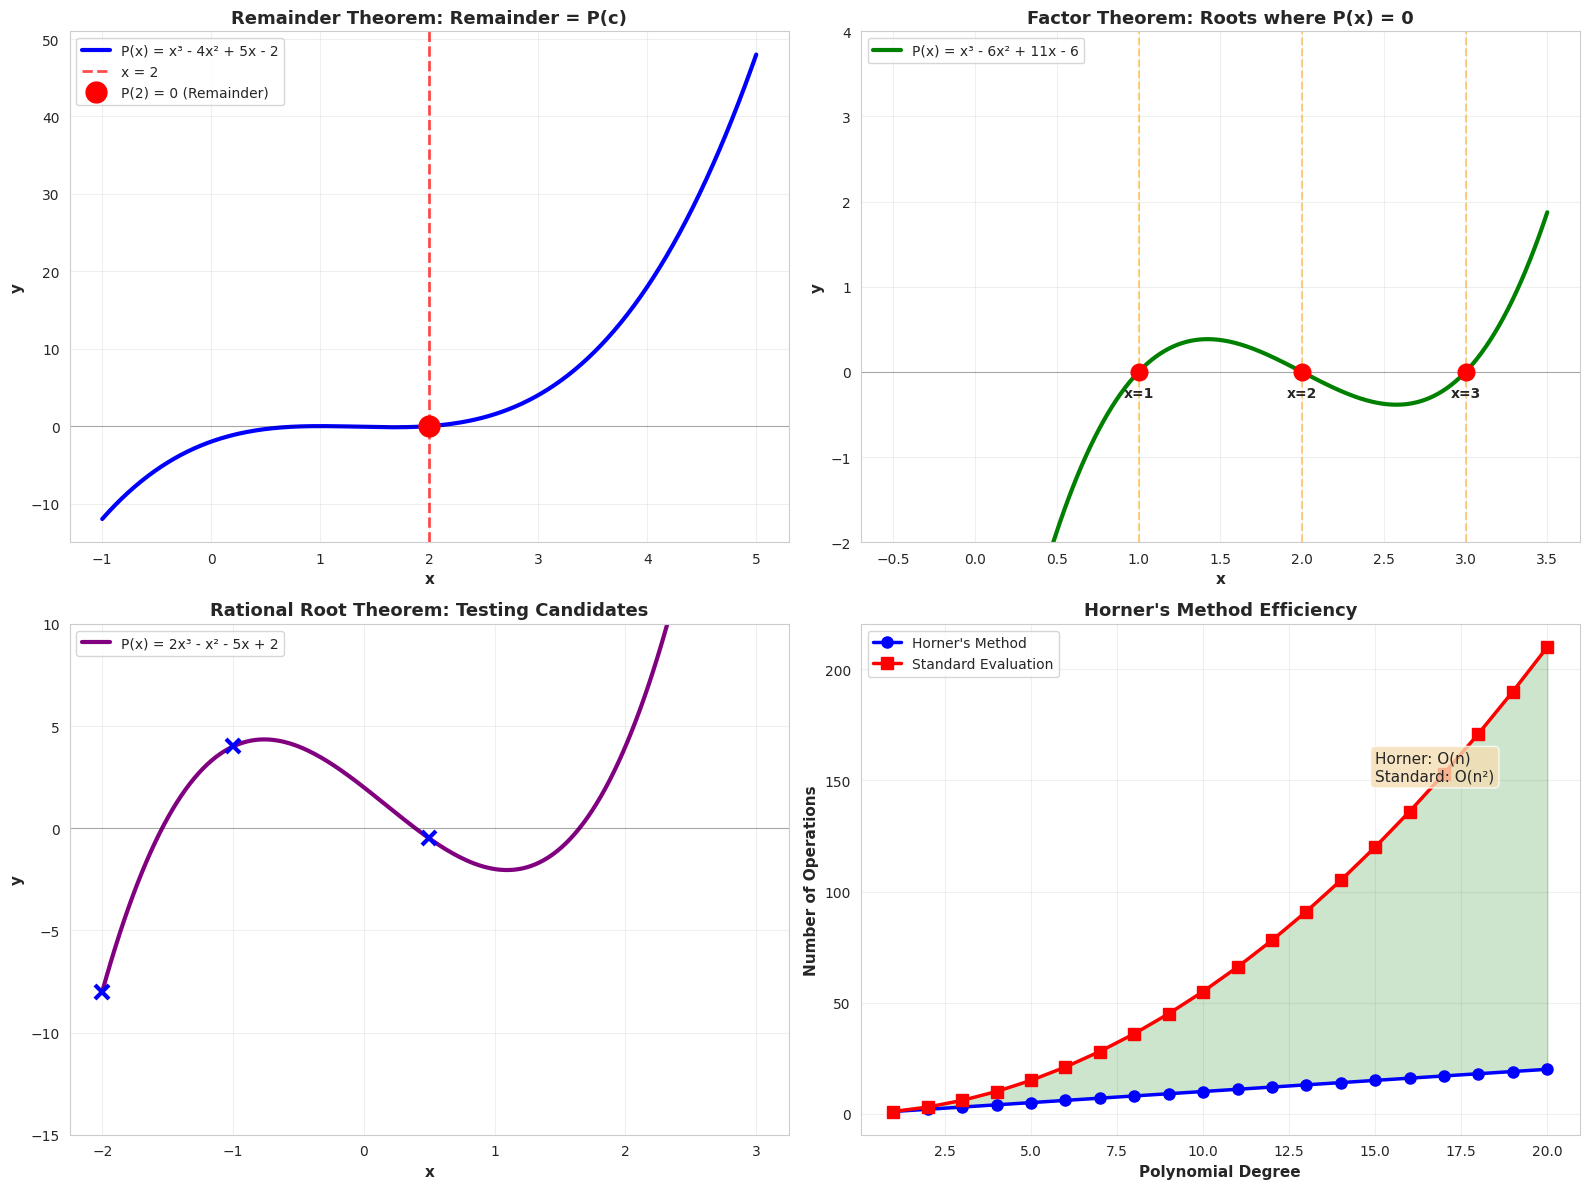

In [17]:
# Theorems Visualization (4-panel plot)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Remainder Theorem Demonstration
ax1 = axes[0, 0]
x_vals = np.linspace(-1, 5, 300)
p1 = np.poly1d([1, -4, 5, -2])
c_val = 2

ax1.plot(x_vals, p1(x_vals), 'b-', linewidth=3, label='P(x) = x³ - 4x² + 5x - 2')
ax1.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax1.axvline(x=c_val, color='r', linewidth=2, linestyle='--', alpha=0.7, label=f'x = {c_val}')
ax1.plot(c_val, p1(c_val), 'ro', markersize=15, label=f'P({c_val}) = {p1(c_val):.0f} (Remainder)')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=11, fontweight='bold')
ax1.set_ylabel('y', fontsize=11, fontweight='bold')
ax1.set_title('Remainder Theorem: Remainder = P(c)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)

# Plot 2: Factor Theorem - Finding Roots
ax2 = axes[0, 1]
p2 = np.poly1d([1, -6, 11, -6])  # (x-1)(x-2)(x-3)
x_vals2 = np.linspace(-0.5, 3.5, 300)

ax2.plot(x_vals2, p2(x_vals2), 'g-', linewidth=3, label='P(x) = x³ - 6x² + 11x - 6')
ax2.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)

roots = [1, 2, 3]
for root in roots:
    ax2.axvline(x=root, color='orange', linewidth=1.5, linestyle='--', alpha=0.5)
    ax2.plot(root, 0, 'ro', markersize=12)
    ax2.text(root, -0.3, f'x={root}', ha='center', fontsize=10, fontweight='bold')

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=11, fontweight='bold')
ax2.set_ylabel('y', fontsize=11, fontweight='bold')
ax2.set_title('Factor Theorem: Roots where P(x) = 0', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_ylim(-2, 4)

# Plot 3: Testing Rational Root Candidates
ax3 = axes[1, 0]
p3 = np.poly1d([2, -1, -5, 2])
x_vals3 = np.linspace(-2, 3, 300)

ax3.plot(x_vals3, p3(x_vals3), 'purple', linewidth=3, label='P(x) = 2x³ - x² - 5x + 2')
ax3.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)

# Mark actual roots found
for root in actual_roots:
    ax3.plot(root, 0, 'ro', markersize=12, zorder=5)
    ax3.text(root, -1.5, f'{root:.1f}', ha='center', fontsize=10, fontweight='bold', color='red')

# Mark tested candidates that aren't roots
for cand in [-2, -1, 0.5]:
    if cand not in actual_roots:
        ax3.plot(cand, p3(cand), 'bx', markersize=10, markeredgewidth=3)

ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=11, fontweight='bold')
ax3.set_ylabel('y', fontsize=11, fontweight='bold')
ax3.set_title('Rational Root Theorem: Testing Candidates', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.set_ylim(-15, 10)

# Plot 4: Horner's Method Efficiency
ax4 = axes[1, 1]

# Compare evaluation methods
degrees = np.arange(1, 21)
horner_ops = degrees  # n multiplications + n additions = 2n ≈ n
standard_ops = [d * (d + 1) / 2 for d in degrees]  # Sum of powers

ax4.plot(degrees, horner_ops, 'b-o', linewidth=2.5, markersize=8, label="Horner's Method")
ax4.plot(degrees, standard_ops, 'r-s', linewidth=2.5, markersize=8, label='Standard Evaluation')
ax4.fill_between(degrees, horner_ops, standard_ops, alpha=0.2, color='green')
ax4.grid(True, alpha=0.3)
ax4.set_xlabel('Polynomial Degree', fontsize=11, fontweight='bold')
ax4.set_ylabel('Number of Operations', fontsize=11, fontweight='bold')
ax4.set_title("Horner's Method Efficiency", fontsize=13, fontweight='bold')
ax4.legend(fontsize=10)
ax4.text(15, 150, 'Horner: O(n)\nStandard: O(n²)', fontsize=11, 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [18]:
# Key Insights Summary

print("\n" + "=" * 70)
print("🎯 Key Insights:")
print("   • Remainder Theorem: Quick evaluation without division")
print("   • Factor Theorem: Test factors by checking P(c) = 0")
print("   • Rational Root Theorem: Narrows candidates to test")
print("   • Horner's Method: Efficient O(n) evaluation algorithm")
print("=" * 70)


🎯 Key Insights:
   • Remainder Theorem: Quick evaluation without division
   • Factor Theorem: Test factors by checking P(c) = 0
   • Rational Root Theorem: Narrows candidates to test
   • Horner's Method: Efficient O(n) evaluation algorithm


## 4. Polynomial Division

### **Division Algorithm for Polynomials**

**Theorem**: For polynomials $P(x)$ (dividend) and $D(x)$ (divisor) with $D(x) \neq 0$, there exist **unique** polynomials $Q(x)$ (quotient) and $R(x)$ (remainder) such that:

$$P(x) = D(x) \cdot Q(x) + R(x)$$

where either $R(x) = 0$ or $\deg(R) < \deg(D)$.

**Analogy to Integer Division**: Just like $17 = 5 \times 3 + 2$, we have $x^2 + 3x + 2 = (x+1) \cdot x + (x+2)$.

---

### **Long Division Method**

**Process**: Similar to arithmetic long division.

**Example**: Divide $P(x) = x^3 + 2x^2 - 5x + 3$ by $D(x) = x - 2$

```
Step 1: Divide leading terms: x³ ÷ x = x²
Step 2: Multiply: x²(x - 2) = x³ - 2x²
Step 3: Subtract: (x³ + 2x²) - (x³ - 2x²) = 4x²
Step 4: Bring down: 4x² - 5x
Step 5: Repeat until degree of remainder < degree of divisor

         x² + 4x + 3
       ________________
x - 2 | x³ + 2x² - 5x + 3
        x³ - 2x²
        ________
             4x² - 5x
             4x² - 8x
             ________
                  3x + 3
                  3x - 6
                  ______
                      9  ← Remainder

Result: Q(x) = x² + 4x + 3, R = 9
```

**Verification**:
$$(x - 2)(x^2 + 4x + 3) + 9 = x^3 + 2x^2 - 5x + 3$$ ✓

---

### **Synthetic Division**

**Purpose**: Shortcut for dividing by linear divisors $(x - c)$.

**Advantages**:
- Faster than long division
- Fewer calculations
- Less prone to errors
- Works with Horner's method

**Limitations**: Only works for divisors of the form $(x - c)$.

**Example**: Divide $x^3 + 2x^2 - 5x + 3$ by $(x - 2)$ (i.e., $c = 2$)

```
Coefficients: [1, 2, -5, 3]
c = 2

     1   2   -5   3
     ↓   2    8   6
    ──────────────
     1   4    3   9  ← 9 is remainder
     
Quotient: x² + 4x + 3
Remainder: 9
```

**Algorithm**:
1. Write coefficients of dividend
2. Write $c$ to the left
3. Bring down first coefficient
4. Multiply by $c$, add to next coefficient
5. Repeat until done
6. Last number is remainder, others are quotient coefficients

---

### **Special Cases**

#### **1. Division by Monomial**
Divide each term independently.

**Example**:
$$\frac{6x^4 - 9x^3 + 12x^2}{3x^2} = \frac{6x^4}{3x^2} - \frac{9x^3}{3x^2} + \frac{12x^2}{3x^2} = 2x^2 - 3x + 4$$

#### **2. Exact Division (Remainder = 0)**
If $R(x) = 0$, then $D(x)$ **divides** $P(x)$ evenly, and $D(x)$ is a **factor**.

**Example**: $(x^2 - 4) \div (x - 2) = x + 2$ with remainder 0

#### **3. Higher Degree Divisors**
Use long division for divisors like $x^2 + 1$, $2x^2 - 3x + 1$, etc.

---

### **Relationship to Factor Theorem**

$$\text{If } P(x) = D(x) \cdot Q(x) + R \text{ and } D(x) = (x - c):$$

- **Remainder** $R = P(c)$ (Remainder Theorem)
- If $R = 0$, then $(x - c)$ is a **factor** (Factor Theorem)

---

### **Applications in Data Science**

1. **Rational Function Simplification**:
   - Simplify $\frac{P(x)}{D(x)}$ by dividing to get $Q(x) + \frac{R(x)}{D(x)}$
   - Useful in signal processing and control theory

2. **Partial Fraction Decomposition**:
   - Required for inverse Laplace transforms
   - Integration of rational functions
   - System analysis in engineering

3. **Asymptotic Analysis**:
   - Understand behavior of $\frac{P(x)}{D(x)}$ as $x \to \infty$
   - Quotient dominates when degrees are similar

4. **Error Analysis**:
   - Remainder represents approximation error
   - Truncated series in numerical methods

5. **Algorithm Design**:
   - Efficient polynomial evaluation
   - Fast Fourier Transform (FFT) implementations
   - Computer algebra systems

---

### **Degree Rules**

Given $P(x) = D(x) \cdot Q(x) + R(x)$:

| **Relationship** | **Formula** |
|------------------|-------------|
| Degree of product | $\deg(D \cdot Q) = \deg(D) + \deg(Q)$ |
| Quotient degree | $\deg(Q) = \deg(P) - \deg(D)$ |
| Remainder degree | $\deg(R) < \deg(D)$ or $R = 0$ |

**Example**: If $\deg(P) = 5$ and $\deg(D) = 2$:
- $\deg(Q) = 5 - 2 = 3$
- $\deg(R) \leq 1$ (at most degree 1)

---

### **Common Pitfalls**

⚠️ **Missing terms**: Include 0 coefficients for missing powers (e.g., $x^3 + 2 = x^3 + 0x^2 + 0x + 2$)  
⚠️ **Sign errors**: Be careful with subtraction in long division  
⚠️ **Synthetic division only for $(x - c)$**: Can't use for $x + 2$ without rewriting as $(x - (-2))$  
⚠️ **Degree check**: Always verify $\deg(R) < \deg(D)$  
⚠️ **Verification**: Multiply back to check: $P(x) = D(x) \cdot Q(x) + R(x)$

In [19]:
# Polynomial Division - Function and Basic Examples

print("=" * 70)
print("POLYNOMIAL DIVISION")
print("=" * 70)

# Long Division Implementation
def polynomial_long_division(dividend_coeffs, divisor_coeffs):
    """
    Perform polynomial long division.
    
    Parameters:
    -----------
    dividend_coeffs : list
        Coefficients of P(x) in descending order
    divisor_coeffs : list
        Coefficients of D(x) in descending order
    
    Returns:
    --------
    quotient_coeffs : list
        Coefficients of Q(x)
    remainder_coeffs : list
        Coefficients of R(x)
    """
    # Use numpy's polydiv
    quotient, remainder = np.polydiv(dividend_coeffs, divisor_coeffs)
    return quotient, remainder

# Example 1: Long Division with Linear Divisor
print("\n1. LONG DIVISION: (x³ + 2x² - 5x + 3) ÷ (x - 2)")

dividend1 = [1, 2, -5, 3]
divisor1 = [1, -2]

quotient1, remainder1 = polynomial_long_division(dividend1, divisor1)

print(f"   Dividend:  P(x) = {np.poly1d(dividend1)}")
print(f"   Divisor:   D(x) = {np.poly1d(divisor1)}")
print(f"   Quotient:  Q(x) = {np.poly1d(quotient1)}")
print(f"   Remainder: R(x) = {remainder1[0] if len(remainder1) > 0 else 0:.1f}")

# Verification
verification1 = np.polymul(divisor1, quotient1)
verification1 = np.polyadd(verification1, remainder1)
print(f"\n   Verification: D(x)·Q(x) + R(x) = {np.poly1d(verification1)}")
print(f"   Original P(x) = {np.poly1d(dividend1)} ✓")

# Example 2: Synthetic Division (same problem)
print("\n2. SYNTHETIC DIVISION: Same problem using Horner's method")

coeffs_syn = [1, 2, -5, 3]
c_syn = 2

quotient_syn, remainder_syn = horners_method(coeffs_syn, c_syn)

print(f"   Synthetic Division by (x - {c_syn}):")
print(f"   Coefficients: {coeffs_syn}")
print(f"   Quotient: {quotient_syn}")
print(f"   Remainder: {remainder_syn}")
print(f"\n   Result: Q(x) = {np.poly1d(quotient_syn)}, R = {remainder_syn}")

# Example 3: Division by Quadratic
print("\n3. LONG DIVISION: (2x⁴ - 3x³ + 5x² - 7x + 2) ÷ (x² - 2x + 1)")

dividend3 = [2, -3, 5, -7, 2]
divisor3 = [1, -2, 1]

quotient3, remainder3 = polynomial_long_division(dividend3, divisor3)

print(f"   Dividend:  P(x) = {np.poly1d(dividend3)}")
print(f"   Divisor:   D(x) = {np.poly1d(divisor3)}")
print(f"   Quotient:  Q(x) = {np.poly1d(quotient3)}")
print(f"   Remainder: R(x) = {np.poly1d(remainder3) if len(remainder3) > 0 else 0}")

# Example 4: Division by Monomial
print("\n4. DIVISION BY MONOMIAL: (6x⁴ - 9x³ + 12x²) ÷ (3x²)")

print("   Divide each term:")
print("   6x⁴/(3x²) - 9x³/(3x²) + 12x²/(3x²)")
print("   = 2x² - 3x + 4")

dividend4 = [6, -9, 12, 0, 0]
divisor4 = [3, 0, 0]

quotient4, remainder4 = polynomial_long_division(dividend4, divisor4)
print(f"\n   NumPy result: Q(x) = {np.poly1d(quotient4)}")

POLYNOMIAL DIVISION

1. LONG DIVISION: (x³ + 2x² - 5x + 3) ÷ (x - 2)
   Dividend:  P(x) =    3     2
1 x + 2 x - 5 x + 3
   Divisor:   D(x) =  
1 x - 2
   Quotient:  Q(x) =    2
1 x + 4 x + 3
   Remainder: R(x) = 9.0

   Verification: D(x)·Q(x) + R(x) =    3     2
1 x + 2 x - 5 x + 3
   Original P(x) =    3     2
1 x + 2 x - 5 x + 3 ✓

2. SYNTHETIC DIVISION: Same problem using Horner's method
   Synthetic Division by (x - 2):
   Coefficients: [1, 2, -5, 3]
   Quotient: [1, 4, 3]
   Remainder: 9

   Result: Q(x) =    2
1 x + 4 x + 3, R = 9

3. LONG DIVISION: (2x⁴ - 3x³ + 5x² - 7x + 2) ÷ (x² - 2x + 1)
   Dividend:  P(x) =    4     3     2
2 x - 3 x + 5 x - 7 x + 2
   Divisor:   D(x) =    2
1 x - 2 x + 1
   Quotient:  Q(x) =    2
2 x + 1 x + 5
   Remainder: R(x) =  
2 x - 3

4. DIVISION BY MONOMIAL: (6x⁴ - 9x³ + 12x²) ÷ (3x²)
   Divide each term:
   6x⁴/(3x²) - 9x³/(3x²) + 12x²/(3x²)
   = 2x² - 3x + 4

   NumPy result: Q(x) =    2
2 x - 3 x + 4


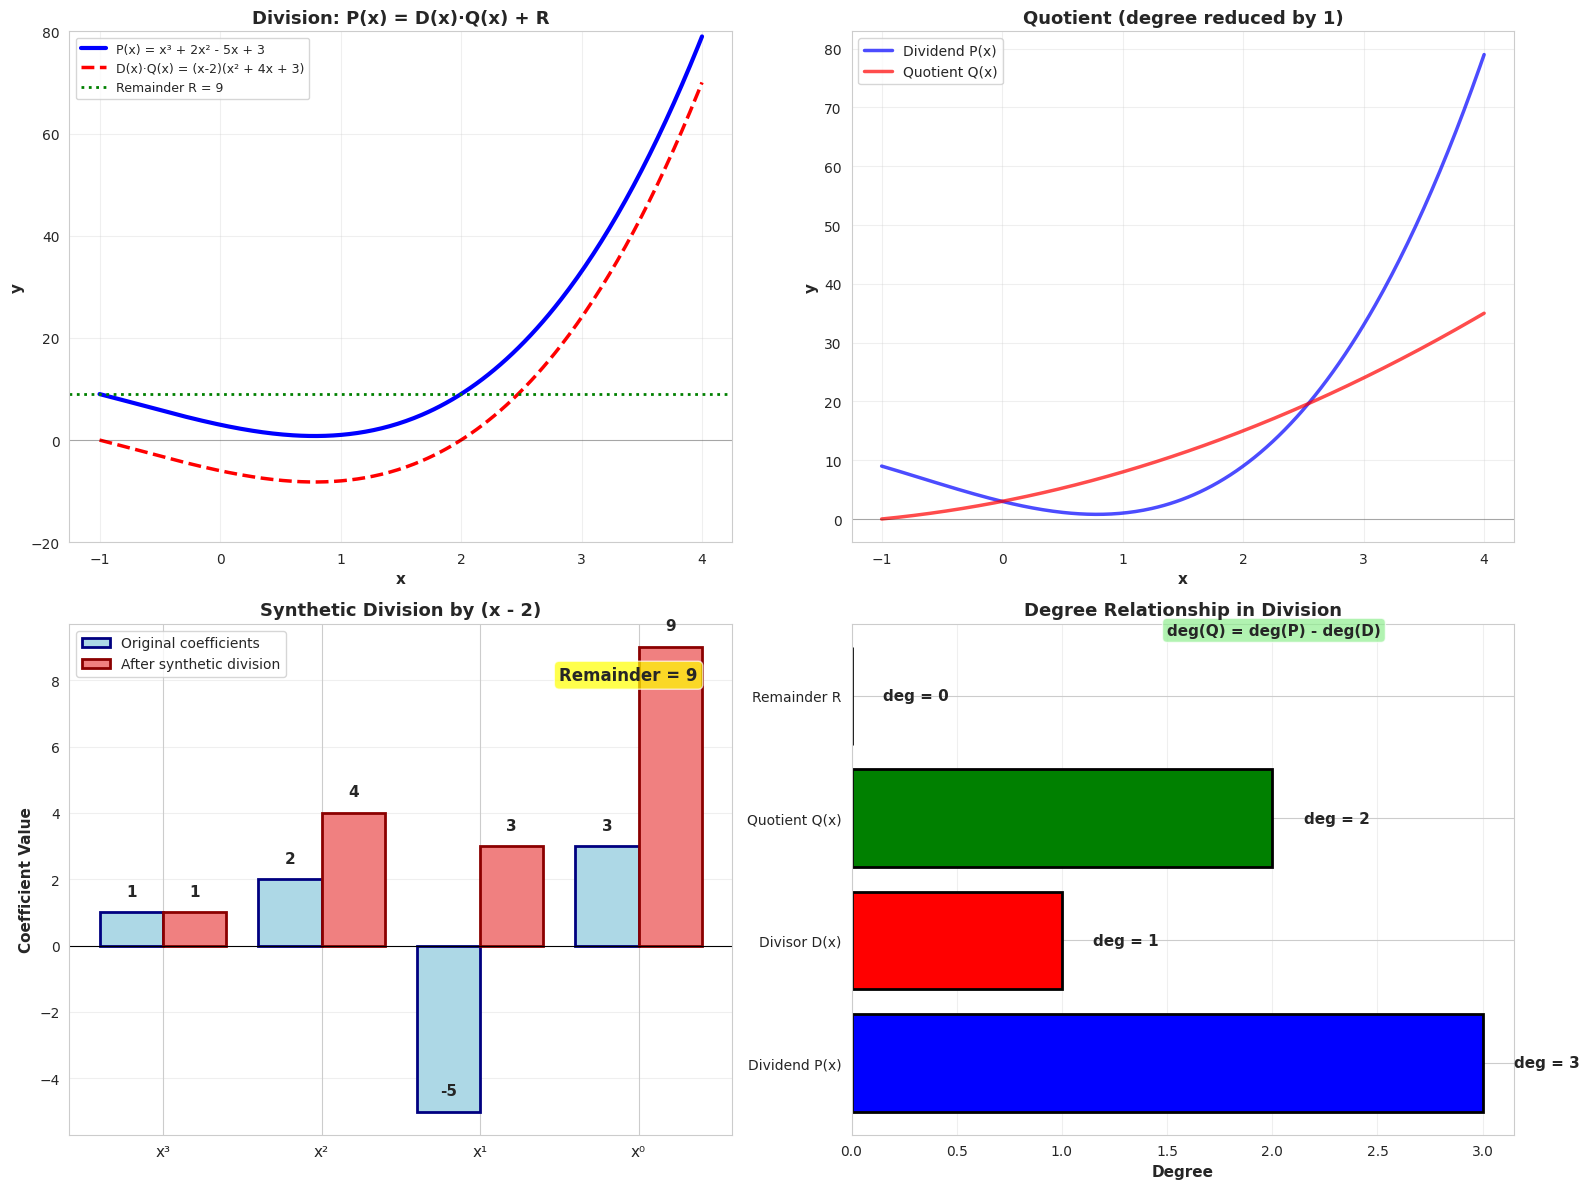

In [20]:
# Polynomial Division - Visualization (4-panel plot)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Visualizing Division Geometrically
ax1 = axes[0, 0]
x_vals = np.linspace(-1, 4, 300)

p_div = np.poly1d([1, 2, -5, 3])
d_div = np.poly1d([1, -2])
q_div = np.poly1d(quotient1)

ax1.plot(x_vals, p_div(x_vals), 'b-', linewidth=3, label='P(x) = x³ + 2x² - 5x + 3')
ax1.plot(x_vals, d_div(x_vals) * q_div(x_vals), 'r--', linewidth=2.5, 
        label='D(x)·Q(x) = (x-2)(x² + 4x + 3)')
ax1.axhline(y=remainder1[0], color='g', linewidth=2, linestyle=':', 
           label=f'Remainder R = {remainder1[0]:.0f}')
ax1.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=11, fontweight='bold')
ax1.set_ylabel('y', fontsize=11, fontweight='bold')
ax1.set_title('Division: P(x) = D(x)·Q(x) + R', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.set_ylim(-20, 80)

# Plot 2: Quotient vs Dividend
ax2 = axes[0, 1]

ax2.plot(x_vals, p_div(x_vals), 'b-', linewidth=2.5, alpha=0.7, label='Dividend P(x)')
ax2.plot(x_vals, q_div(x_vals), 'r-', linewidth=2.5, alpha=0.7, label='Quotient Q(x)')
ax2.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=11, fontweight='bold')
ax2.set_ylabel('y', fontsize=11, fontweight='bold')
ax2.set_title('Quotient (degree reduced by 1)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)

# Plot 3: Synthetic Division Process
ax3 = axes[1, 0]

# Show synthetic division table visually
coeffs_table = [1, 2, -5, 3]
c_table = 2

# Calculate synthetic division step by step
current = 0
results = []
for coeff in coeffs_table:
    current = current * c_table + coeff
    results.append(current)

# Create table visualization
steps = len(coeffs_table)
x_positions = np.arange(steps)

ax3.bar(x_positions - 0.2, coeffs_table, width=0.4, label='Original coefficients', 
       color='lightblue', edgecolor='navy', linewidth=2)
ax3.bar(x_positions + 0.2, results, width=0.4, label='After synthetic division',
       color='lightcoral', edgecolor='darkred', linewidth=2)

for i, (orig, res) in enumerate(zip(coeffs_table, results)):
    ax3.text(i - 0.2, orig + 0.5, str(orig), ha='center', fontsize=11, fontweight='bold')
    ax3.text(i + 0.2, res + 0.5, str(res), ha='center', fontsize=11, fontweight='bold')

ax3.axhline(y=0, color='k', linewidth=0.8)
ax3.set_xticks(x_positions)
ax3.set_xticklabels(['x³', 'x²', 'x¹', 'x⁰'], fontsize=11)
ax3.set_ylabel('Coefficient Value', fontsize=11, fontweight='bold')
ax3.set_title(f'Synthetic Division by (x - {c_table})', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')
ax3.text(2.5, 8, f'Remainder = {results[-1]}', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Plot 4: Degree Relationship
ax4 = axes[1, 1]

# Show how degrees relate
degrees_data = {
    'Dividend P(x)': 3,
    'Divisor D(x)': 1,
    'Quotient Q(x)': 2,
    'Remainder R': 0
}

colors_deg = ['blue', 'red', 'green', 'orange']
bars = ax4.barh(list(degrees_data.keys()), list(degrees_data.values()), 
               color=colors_deg, edgecolor='black', linewidth=2)

for i, (bar, (name, deg)) in enumerate(zip(bars, degrees_data.items())):
    ax4.text(deg + 0.15, i, f'deg = {deg}', va='center', fontsize=11, fontweight='bold')

ax4.set_xlabel('Degree', fontsize=11, fontweight='bold')
ax4.set_title('Degree Relationship in Division', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')
ax4.text(1.5, 3.5, 'deg(Q) = deg(P) - deg(D)', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

In [21]:
# Data Science Application: Rational Function Simplification - Setup

print("\n" + "=" * 70)
print("DATA SCIENCE APPLICATION: RATIONAL FUNCTIONS")
print("=" * 70)

print("\nSimplifying rational functions:")
print("   R(x) = P(x) / D(x) = Q(x) + Remainder/D(x)")
print("\nExample: (x³ + 2x² - 5x + 3) / (x - 2)")
print(f"   = {np.poly1d(quotient1)} + {remainder1[0]:.0f}/(x - 2)")
print(f"   = x² + 4x + 3 + 9/(x - 2)")

# Asymptotic behavior
print("\nAsymptotic behavior as x → ∞:")
print("   The quotient Q(x) dominates")
print(f"   R(x) ≈ Q(x) = {np.poly1d(quotient1)} for large |x|")


DATA SCIENCE APPLICATION: RATIONAL FUNCTIONS

Simplifying rational functions:
   R(x) = P(x) / D(x) = Q(x) + Remainder/D(x)

Example: (x³ + 2x² - 5x + 3) / (x - 2)
   =    2
1 x + 4 x + 3 + 9/(x - 2)
   = x² + 4x + 3 + 9/(x - 2)

Asymptotic behavior as x → ∞:
   The quotient Q(x) dominates
   R(x) ≈ Q(x) =    2
1 x + 4 x + 3 for large |x|


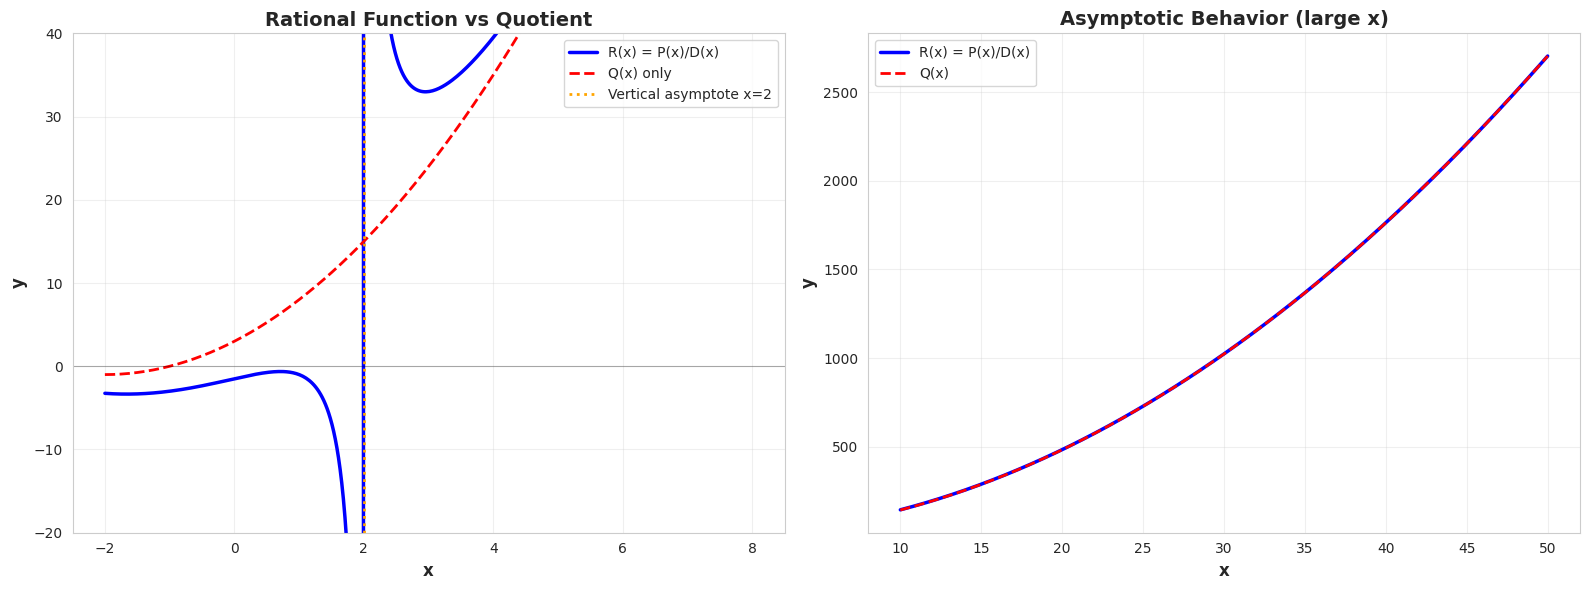

In [22]:
# Rational Functions - Visualization (2-panel plot)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x_rational = np.linspace(-2, 8, 400)
# Avoid division by zero at x=2
x_rational_safe = x_rational[np.abs(x_rational - 2) > 0.01]

rational_func = p_div(x_rational_safe) / d_div(x_rational_safe)
quotient_only = q_div(x_rational_safe)

ax1.plot(x_rational_safe, rational_func, 'b-', linewidth=2.5, label='R(x) = P(x)/D(x)')
ax1.plot(x_rational_safe, quotient_only, 'r--', linewidth=2, label='Q(x) only')
ax1.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax1.axvline(x=2, color='orange', linewidth=2, linestyle=':', label='Vertical asymptote x=2')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('Rational Function vs Quotient', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_ylim(-20, 40)

# Zoom in on asymptotic behavior
x_far = np.linspace(10, 50, 200)
rational_far = p_div(x_far) / d_div(x_far)
quotient_far = q_div(x_far)

ax2.plot(x_far, rational_far, 'b-', linewidth=2.5, label='R(x) = P(x)/D(x)')
ax2.plot(x_far, quotient_far, 'r--', linewidth=2, label='Q(x)')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title('Asymptotic Behavior (large x)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [23]:
# Polynomial Division - Key Insights

print("\n🎯 Key Insights:")
print("   • Long division: Works for any divisor")
print("   • Synthetic division: Fast for linear divisors (x - c)")
print("   • deg(Q) = deg(P) - deg(D)")
print("   • deg(R) < deg(D)")
print("   • Verification: P(x) = D(x)·Q(x) + R(x)")


🎯 Key Insights:
   • Long division: Works for any divisor
   • Synthetic division: Fast for linear divisors (x - c)
   • deg(Q) = deg(P) - deg(D)
   • deg(R) < deg(D)
   • Verification: P(x) = D(x)·Q(x) + R(x)


## 5. Applications: Polynomial Regression and Data Fitting

### **What is Polynomial Regression?**

**Polynomial regression** extends linear regression by fitting data with polynomial functions:

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n + \epsilon$$

where:
- $y$: Target variable (response)
- $x$: Feature (predictor)
- $\beta_i$: Coefficients to learn
- $n$: Polynomial degree
- $\epsilon$: Random error

**Purpose**: Model **non-linear relationships** using polynomial features.

---

### **Why Use Polynomial Regression?**

1. **Captures Non-Linearity**:
   - Real-world relationships are rarely linear
   - Examples: parabolic trajectories, growth curves, seasonal patterns

2. **Still Linear in Parameters**:
   - Despite non-linear features ($x^2, x^3$), model remains **linear in coefficients** $\beta_i$
   - Can use ordinary least squares (OLS) to solve

3. **Flexible Model Family**:
   - Degree 1: Linear regression
   - Degree 2: Quadratic (parabolic)
   - Degree 3+: Higher-order curves

---

### **Mathematical Formulation**

**Feature Engineering**: Transform $x$ into polynomial features:

$$\mathbf{X} = \begin{bmatrix} 1 & x_1 & x_1^2 & \cdots & x_1^n \\ 1 & x_2 & x_2^2 & \cdots & x_2^n \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_m & x_m^2 & \cdots & x_m^n \end{bmatrix}$$

**Fitting**: Solve for coefficients $\boldsymbol{\beta} = [\beta_0, \beta_1, \ldots, \beta_n]^T$:

$$\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

**Prediction**: Given new $x_{new}$:

$$\hat{y}_{new} = \beta_0 + \beta_1 x_{new} + \beta_2 x_{new}^2 + \cdots + \beta_n x_{new}^n$$

---

### **Choosing the Right Degree**

| **Degree** | **Model Type** | **Behavior** | **Use Case** |
|------------|----------------|--------------|--------------|
| 1 | Linear | Straight line | Simple trends |
| 2 | Quadratic | Parabola (1 peak/valley) | Optimization, trajectories |
| 3 | Cubic | S-curve (2 inflection points) | Growth models, sigmoid approximation |
| 4-5 | Quartic/Quintic | Multiple peaks/valleys | Complex periodic patterns |
| 10+ | High-degree | Overfitting risk | Rarely justified |

---

### **Bias-Variance Tradeoff**

**Underfitting (High Bias)**:
- Degree too low
- Model too simple
- Poor fit on both training and test data
- Example: Fitting quadratic data with linear model

**Optimal Fit**:
- Degree matches data complexity
- Generalizes well to unseen data
- Balanced error on training and validation

**Overfitting (High Variance)**:
- Degree too high
- Model memorizes noise
- Perfect training fit, poor test performance
- Example: Degree 10 polynomial for 5 data points

---

### **Model Evaluation Metrics**

1. **R² Score (Coefficient of Determination)**:
   $$R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$
   - Range: $(-\infty, 1]$
   - $R^2 = 1$: Perfect fit
   - $R^2 = 0$: Model no better than mean
   - $R^2 < 0$: Model worse than mean

2. **Mean Squared Error (MSE)**:
   $$\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$

3. **Root Mean Squared Error (RMSE)**:
   $$\text{RMSE} = \sqrt{\text{MSE}}$$

4. **Cross-Validation Score**:
   - Split data into train/test sets
   - Evaluate generalization performance

---

### **Polynomial Interpolation**

**Definition**: Find polynomial $P(x)$ that passes **exactly** through $n+1$ given points $(x_0, y_0), \ldots, (x_n, y_n)$.

**Lagrange Interpolation Formula**:

$$P(x) = \sum_{i=0}^{n} y_i \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}$$

**Degree**: For $n+1$ points, interpolating polynomial has degree $\leq n$.

**Uniqueness**: There is exactly **one** polynomial of degree $\leq n$ passing through $n+1$ distinct points.

**Applications**:
- Approximate functions between known points
- Computer graphics (Bézier curves)
- Numerical integration (Simpson's rule)

---

### **Regularization Techniques**

To combat overfitting in high-degree polynomials:

1. **Ridge Regression (L2)**:
   $$\min_{\boldsymbol{\beta}} \| \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \|^2 + \lambda \|\boldsymbol{\beta}\|^2$$
   - Penalizes large coefficients
   - $\lambda > 0$: regularization strength

2. **Lasso Regression (L1)**:
   $$\min_{\boldsymbol{\beta}} \| \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \|^2 + \lambda \|\boldsymbol{\beta}\|_1$$
   - Can drive coefficients to exactly zero
   - Feature selection

---

### **Data Science Applications**

1. **Time Series Forecasting**:
   - Model trends: $\text{sales}(t) = \beta_0 + \beta_1 t + \beta_2 t^2$
   - Seasonal patterns with polynomial terms

2. **Computer Vision**:
   - Curve fitting for object boundaries
   - Polynomial lens distortion correction

3. **Physics & Engineering**:
   - Projectile motion: $y = a + bx + cx^2$
   - Calibration curves for sensors

4. **Finance**:
   - Model non-linear price movements
   - Polynomial volatility curves

5. **Biology**:
   - Growth curves: logistic growth approximated by polynomials
   - Dose-response relationships

---

### **Advantages vs Disadvantages**

**Advantages**:
✅ Captures non-linear relationships  
✅ Still uses linear regression machinery  
✅ Interpretable coefficients  
✅ Fast computation  
✅ No hyperparameters except degree

**Disadvantages**:
❌ Prone to overfitting with high degrees  
❌ Extrapolation unreliable (especially high degrees)  
❌ Features can be highly correlated (multicollinearity)  
❌ Oscillations between data points (Runge's phenomenon)  
❌ Not suitable for all non-linear patterns

---

### **Best Practices**

1. **Start simple**: Begin with degree 2, increase if needed
2. **Use cross-validation**: Choose degree with best validation score
3. **Visualize fits**: Plot data + fitted curves for all degrees
4. **Check extrapolation**: Be cautious predicting outside data range
5. **Consider alternatives**: Splines, GAMs for complex patterns
6. **Regularize**: Use Ridge/Lasso for high degrees
7. **Scale features**: Standardize $x$ to avoid numerical issues

---

### **Common Pitfalls**

⚠️ **Overfitting**: High $R^2$ on training ≠ good model  
⚠️ **Extrapolation**: Polynomials diverge outside data range  
⚠️ **Multicollinearity**: $x, x^2, x^3$ highly correlated  
⚠️ **Runge's phenomenon**: High-degree polynomials oscillate wildly  
⚠️ **Ignoring validation**: Always test on held-out data

In [24]:
# Polynomial Regression - Setup and Data Generation

print("=" * 70)
print("POLYNOMIAL REGRESSION & DATA FITTING")
print("=" * 70)

# Generate synthetic data with non-linear relationship
np.random.seed(42)
X_data = np.linspace(0, 4, 30)
y_true = 2 + 1.5*X_data - 0.8*X_data**2 + 0.15*X_data**3
y_data = y_true + np.random.normal(0, 1.5, 30)

print("\nTrue relationship: y = 2 + 1.5x - 0.8x² + 0.15x³")
print(f"Generated {len(X_data)} data points with noise")

# Fit polynomials of different degrees
degrees_to_test = [1, 2, 3, 5, 9]
print("\nFitting polynomial models...")

models = {}
for deg in degrees_to_test:
    coeffs = np.polyfit(X_data, y_data, deg)
    poly = np.poly1d(coeffs)
    y_pred = poly(X_data)
    
    # Calculate R² score
    ss_res = np.sum((y_data - y_pred)**2)
    ss_tot = np.sum((y_data - np.mean(y_data))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_data - y_pred)**2))
    
    models[deg] = {
        'poly': poly,
        'r2': r2,
        'rmse': rmse,
        'coeffs': coeffs
    }
    
    print(f"  Degree {deg}: R² = {r2:.4f}, RMSE = {rmse:.4f}")

POLYNOMIAL REGRESSION & DATA FITTING

True relationship: y = 2 + 1.5x - 0.8x² + 0.15x³
Generated 30 data points with noise

Fitting polynomial models...
  Degree 1: R² = 0.0085, RMSE = 1.3139
  Degree 2: R² = 0.1474, RMSE = 1.2184
  Degree 3: R² = 0.1860, RMSE = 1.1905
  Degree 5: R² = 0.2661, RMSE = 1.1304
  Degree 9: R² = 0.3443, RMSE = 1.0685


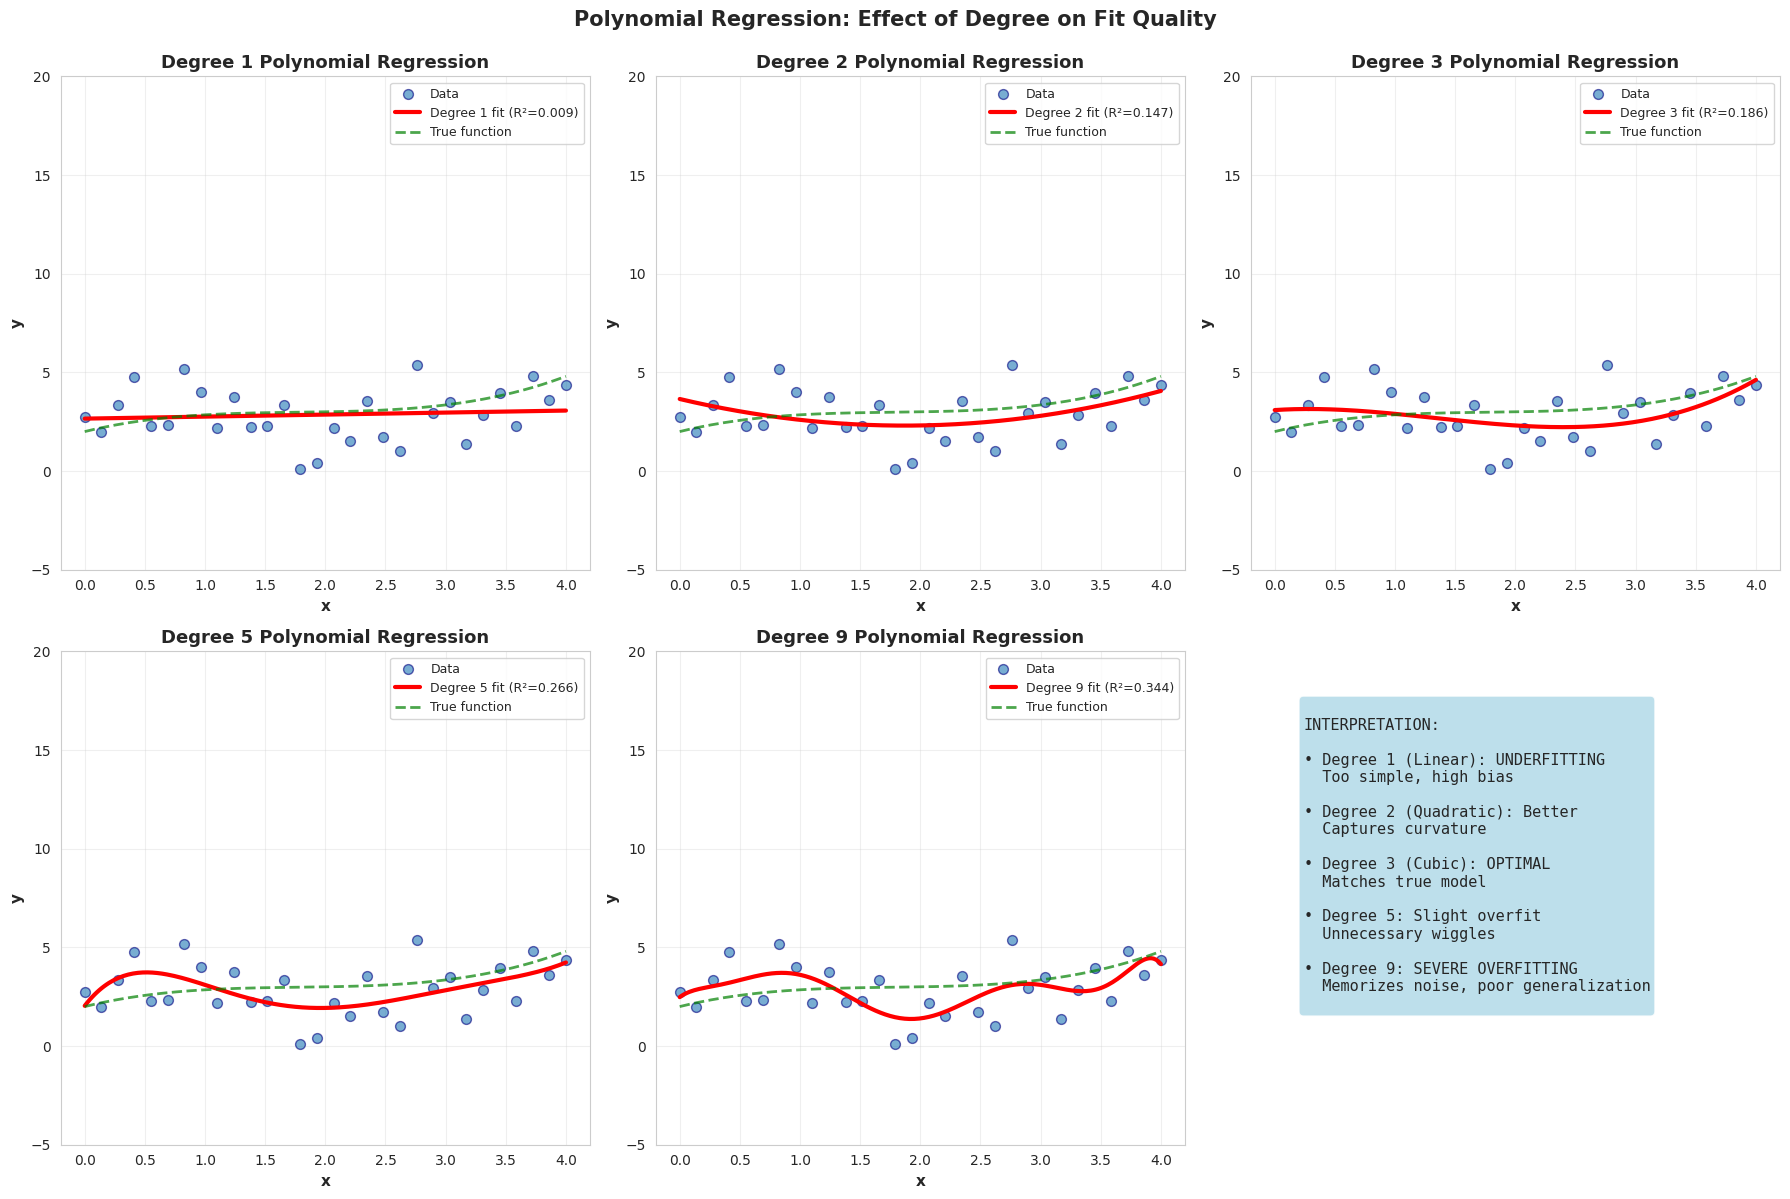

In [25]:
# Polynomial Regression - Different Degrees Visualization (6-panel plot)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
X_plot = np.linspace(0, 4, 200)

for idx, deg in enumerate(degrees_to_test):
    ax = axes[idx // 3, idx % 3]
    
    # Plot fitted polynomial
    poly = models[deg]['poly']
    y_fit = poly(X_plot)
    r2 = models[deg]['r2']
    rmse = models[deg]['rmse']
    
    # Plot
    ax.scatter(X_data, y_data, alpha=0.6, s=50, edgecolors='navy', linewidth=1,
              label='Data')
    ax.plot(X_plot, y_fit, 'r-', linewidth=3,
           label=f'Degree {deg} fit (R²={r2:.3f})')
    ax.plot(X_plot, 2 + 1.5*X_plot - 0.8*X_plot**2 + 0.15*X_plot**3, 'g--',
           linewidth=2, alpha=0.7, label='True function')
    
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x', fontsize=11, fontweight='bold')
    ax.set_ylabel('y', fontsize=11, fontweight='bold')
    ax.set_title(f'Degree {deg} Polynomial Regression', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9)
    ax.set_ylim(-5, 20)

# Add interpretation in the 6th subplot
ax6 = axes[1, 2]
ax6.axis('off')
interpretation_text = """
INTERPRETATION:

• Degree 1 (Linear): UNDERFITTING
  Too simple, high bias

• Degree 2 (Quadratic): Better
  Captures curvature

• Degree 3 (Cubic): OPTIMAL
  Matches true model

• Degree 5: Slight overfit
  Unnecessary wiggles

• Degree 9: SEVERE OVERFITTING
  Memorizes noise, poor generalization
"""
ax6.text(0.1, 0.9, interpretation_text, transform=ax6.transAxes, 
        fontsize=11, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.suptitle('Polynomial Regression: Effect of Degree on Fit Quality',
            fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [26]:
# Bias-Variance Tradeoff - Setup

print("\n" + "=" * 70)
print("BIAS-VARIANCE TRADEOFF")
print("=" * 70)

degrees_range = range(1, 15)
train_errors = []
test_errors = []

# Split data into train and test
split_idx = 20
X_train, X_test = X_data[:split_idx], X_data[split_idx:]
y_train, y_test = y_data[:split_idx], y_data[split_idx:]

for deg in degrees_range:
    # Fit on training data
    coeffs = np.polyfit(X_train, y_train, deg)
    poly = np.poly1d(coeffs)
    
    # Train error
    y_train_pred = poly(X_train)
    train_mse = np.mean((y_train - y_train_pred)**2)
    train_errors.append(train_mse)
    
    # Test error
    y_test_pred = poly(X_test)
    test_mse = np.mean((y_test - y_test_pred)**2)
    test_errors.append(test_mse)


BIAS-VARIANCE TRADEOFF


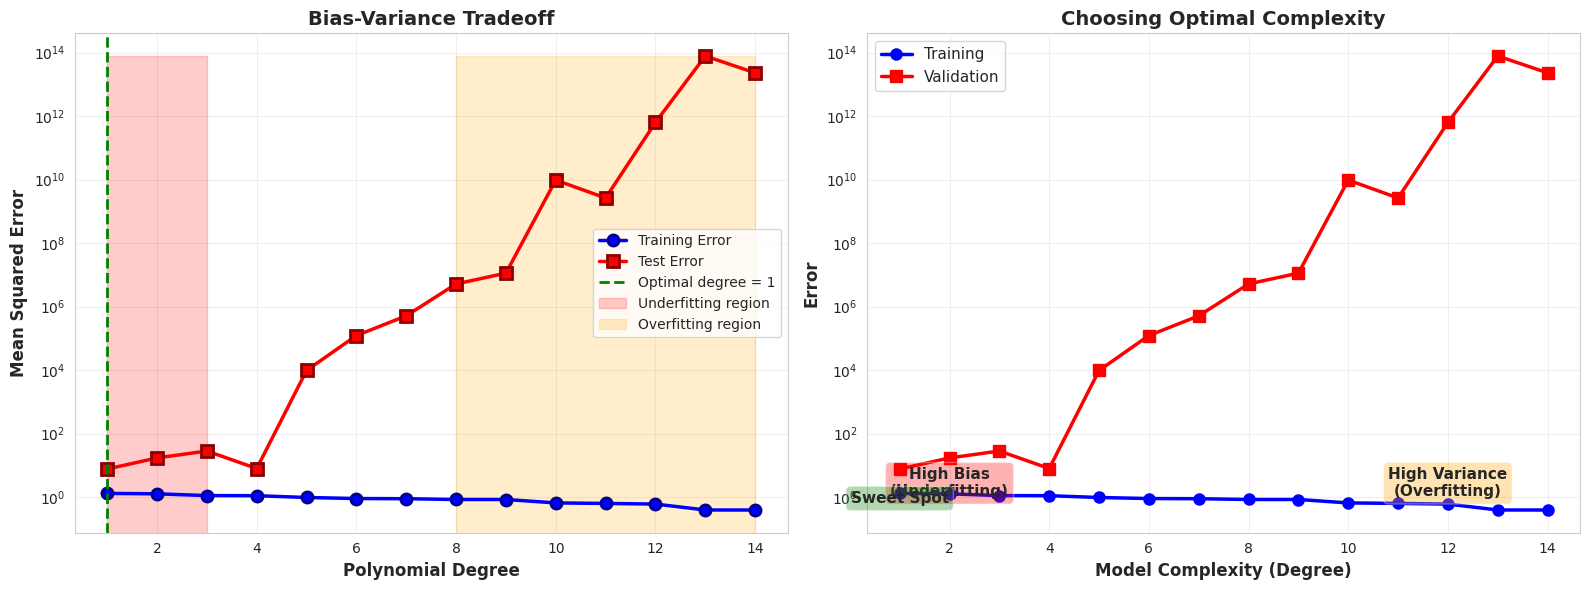

In [27]:
# Bias-Variance Tradeoff - Visualization (2-panel plot)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Train vs Test Error
ax1.plot(degrees_range, train_errors, 'b-o', linewidth=2.5, markersize=8, 
        label='Training Error', markeredgewidth=2, markeredgecolor='darkblue')
ax1.plot(degrees_range, test_errors, 'r-s', linewidth=2.5, markersize=8,
        label='Test Error', markeredgewidth=2, markeredgecolor='darkred')

# Find optimal degree (minimum test error)
optimal_deg = list(degrees_range)[np.argmin(test_errors)]
ax1.axvline(x=optimal_deg, color='green', linewidth=2, linestyle='--',
           label=f'Optimal degree = {optimal_deg}')

ax1.fill_between([1, 3], [0, 0], [max(test_errors), max(test_errors)],
                alpha=0.2, color='red', label='Underfitting region')
ax1.fill_between([8, 14], [0, 0], [max(test_errors), max(test_errors)],
                alpha=0.2, color='orange', label='Overfitting region')

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Polynomial Degree', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Squared Error', fontsize=12, fontweight='bold')
ax1.set_title('Bias-Variance Tradeoff', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_yscale('log')

# Plot 2: Model Complexity vs Error
ax2.plot(degrees_range, train_errors, 'b-o', linewidth=2.5, markersize=8, label='Training')
ax2.plot(degrees_range, test_errors, 'r-s', linewidth=2.5, markersize=8, label='Validation')

# Annotate regions
ax2.text(2, max(train_errors)*0.8, 'High Bias\n(Underfitting)', 
        ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
ax2.text(optimal_deg, max(train_errors)*0.5, 'Sweet Spot', 
        ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='green', alpha=0.3))
ax2.text(12, max(train_errors)*0.8, 'High Variance\n(Overfitting)', 
        ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='orange', alpha=0.3))

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Model Complexity (Degree)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Error', fontsize=12, fontweight='bold')
ax2.set_title('Choosing Optimal Complexity', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

In [28]:
# Polynomial Interpolation - Setup

print("\n" + "=" * 70)
print("POLYNOMIAL INTERPOLATION")
print("=" * 70)

# Define points to interpolate
x_interp = np.array([0, 1, 2, 3, 4])
y_interp = np.array([1, 3, 2, 5, 4])

print(f"\nInterpolating through {len(x_interp)} points:")
for xi, yi in zip(x_interp, y_interp):
    print(f"  ({xi}, {yi})")

# Use scipy's Lagrange interpolation
from scipy.interpolate import lagrange

poly_interp = lagrange(x_interp, y_interp)
print(f"\nInterpolating polynomial (degree {len(x_interp)-1}):")
print(f"  {np.poly1d(poly_interp)}")

# Verify it passes through all points
print("\nVerification:")
for xi, yi in zip(x_interp, y_interp):
    yi_pred = poly_interp(xi)
    print(f"  P({xi}) = {yi_pred:.6f} ≈ {yi} ✓")


POLYNOMIAL INTERPOLATION

Interpolating through 5 points:
  (0, 1)
  (1, 3)
  (2, 2)
  (3, 5)
  (4, 4)

Interpolating polynomial (degree 4):
          4         3         2
-0.625 x + 4.917 x - 11.87 x + 9.583 x + 1

Verification:
  P(0) = 1.000000 ≈ 1 ✓
  P(1) = 3.000000 ≈ 3 ✓
  P(2) = 2.000000 ≈ 2 ✓
  P(3) = 5.000000 ≈ 5 ✓
  P(4) = 4.000000 ≈ 4 ✓


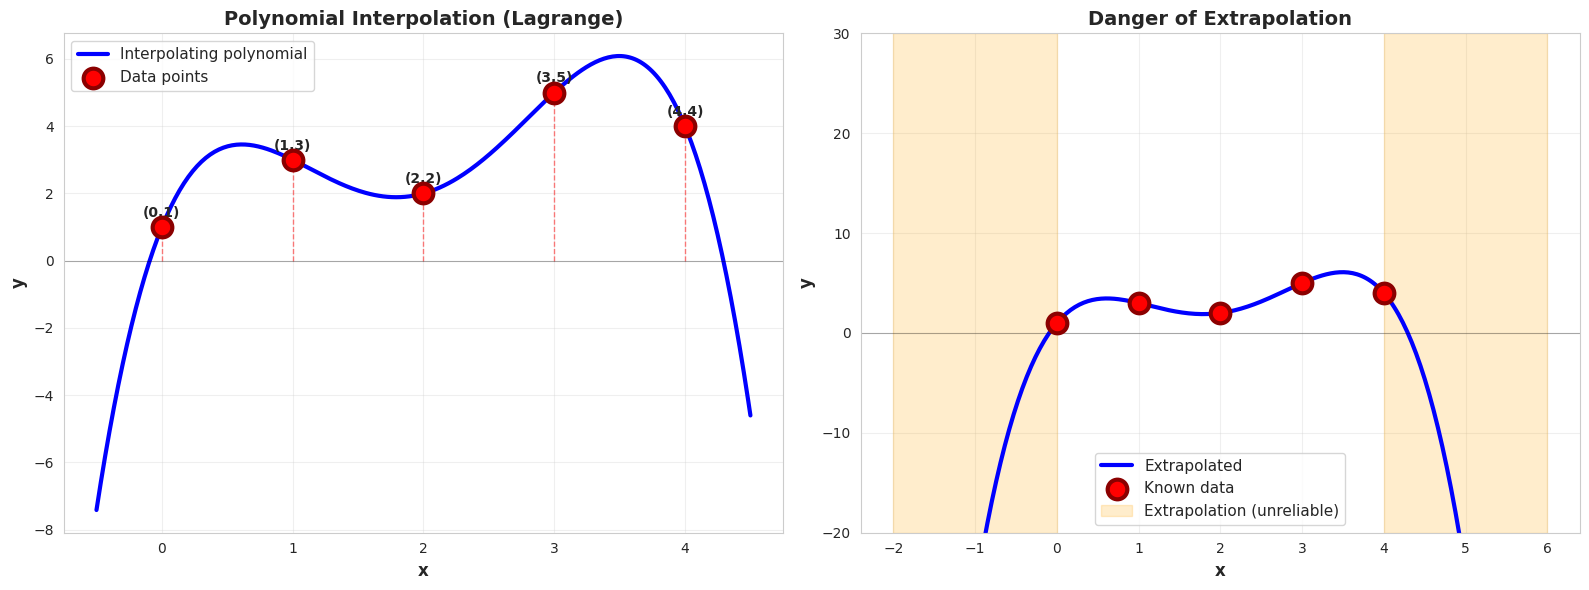

In [29]:
# Polynomial Interpolation - Visualization (2-panel plot)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Interpolation
x_fine = np.linspace(-0.5, 4.5, 300)
y_fine = poly_interp(x_fine)

ax1.plot(x_fine, y_fine, 'b-', linewidth=3, label='Interpolating polynomial')
ax1.scatter(x_interp, y_interp, s=200, c='red', marker='o', edgecolors='darkred',
           linewidth=3, zorder=5, label='Data points')

for xi, yi in zip(x_interp, y_interp):
    ax1.plot([xi, xi], [0, yi], 'r--', linewidth=1, alpha=0.5)
    ax1.text(xi, yi + 0.3, f'({xi},{yi})', ha='center', fontsize=10, fontweight='bold')

ax1.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('Polynomial Interpolation (Lagrange)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)

# Plot 2: Dangers of Extrapolation
x_extrap = np.linspace(-2, 6, 300)
y_extrap = poly_interp(x_extrap)

ax2.plot(x_extrap, y_extrap, 'b-', linewidth=3, label='Extrapolated')
ax2.scatter(x_interp, y_interp, s=200, c='red', marker='o', edgecolors='darkred',
           linewidth=3, zorder=5, label='Known data')

# Highlight extrapolation regions
ax2.axvspan(-2, 0, alpha=0.2, color='orange', label='Extrapolation (unreliable)')
ax2.axvspan(4, 6, alpha=0.2, color='orange')

ax2.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title('Danger of Extrapolation', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.set_ylim(-20, 30)

plt.tight_layout()
plt.show()

In [30]:
# Temperature Forecasting - Setup

print("\n" + "=" * 70)
print("REAL-WORLD: TEMPERATURE FORECASTING")
print("=" * 70)

# Simulate daily temperatures over a year (simplified)
days = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 365])
temps = np.array([5, 8, 12, 18, 24, 28, 30, 28, 23, 17, 11, 7, 5])  # °C

print("\nData: Monthly average temperatures (°C)")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan+1']
for month, day, temp in zip(months, days, temps):
    print(f"  {month:6s}: Day {day:3d}, Temp = {temp}°C")


REAL-WORLD: TEMPERATURE FORECASTING

Data: Monthly average temperatures (°C)
  Jan   : Day   0, Temp = 5°C
  Feb   : Day  30, Temp = 8°C
  Mar   : Day  60, Temp = 12°C
  Apr   : Day  90, Temp = 18°C
  May   : Day 120, Temp = 24°C
  Jun   : Day 150, Temp = 28°C
  Jul   : Day 180, Temp = 30°C
  Aug   : Day 210, Temp = 28°C
  Sep   : Day 240, Temp = 23°C
  Oct   : Day 270, Temp = 17°C
  Nov   : Day 300, Temp = 11°C
  Dec   : Day 330, Temp = 7°C
  Jan+1 : Day 365, Temp = 5°C


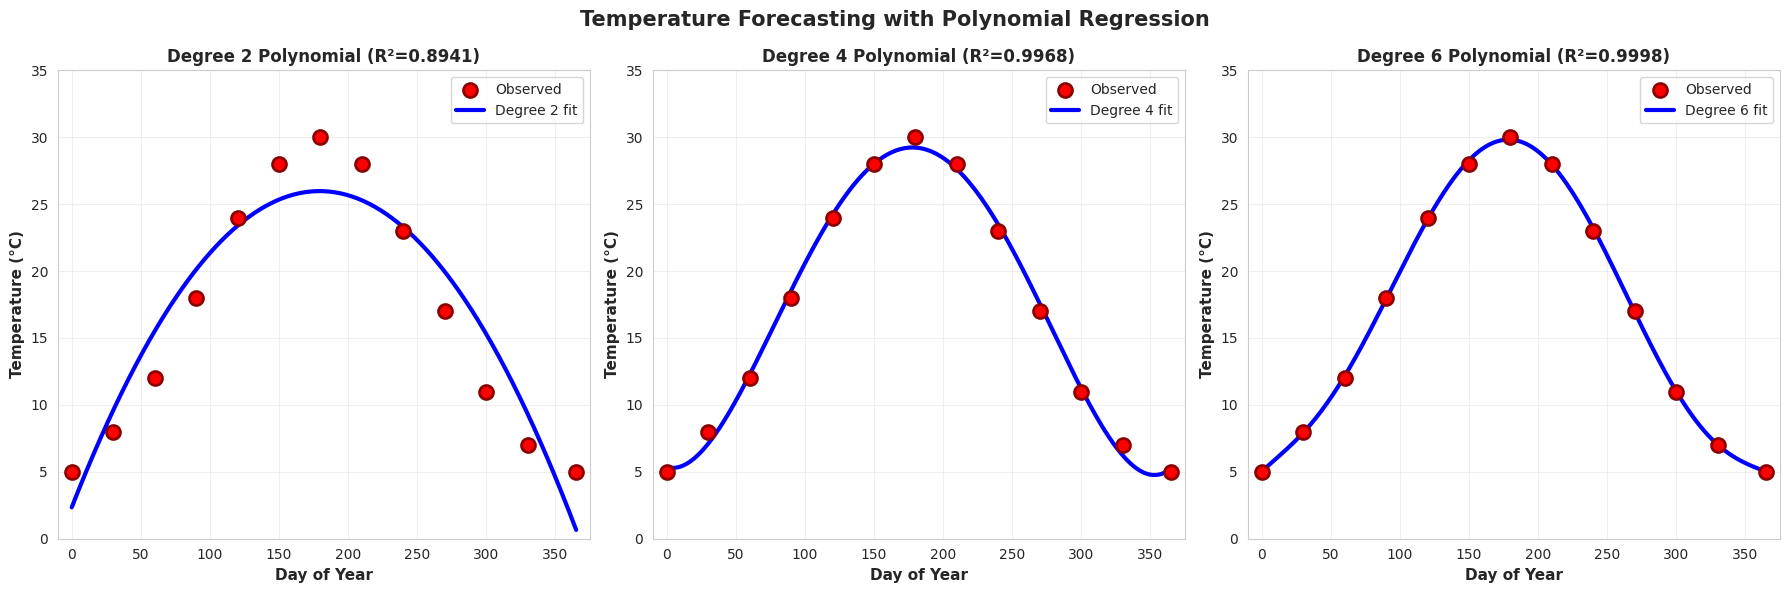

In [31]:
# Temperature Forecasting - Visualization (3-panel plot)

degrees_temp = [2, 4, 6]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, deg in enumerate(degrees_temp):
    ax = axes[idx]
    
    # Fit model
    coeffs = np.polyfit(days, temps, deg)
    poly = np.poly1d(coeffs)
    
    # Predictions
    days_fine = np.linspace(0, 365, 365)
    temps_pred = poly(days_fine)
    
    # R² score
    temps_fit = poly(days)
    r2 = 1 - np.sum((temps - temps_fit)**2) / np.sum((temps - np.mean(temps))**2)
    
    # Plot
    ax.scatter(days, temps, s=100, c='red', marker='o', edgecolors='darkred',
              linewidth=2, zorder=5, label='Observed')
    ax.plot(days_fine, temps_pred, 'b-', linewidth=3, label=f'Degree {deg} fit')
    
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Day of Year', fontsize=11, fontweight='bold')
    ax.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
    ax.set_title(f'Degree {deg} Polynomial (R²={r2:.4f})', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.set_xlim(-10, 375)
    ax.set_ylim(0, 35)

plt.suptitle('Temperature Forecasting with Polynomial Regression',
            fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

In [32]:
# Polynomial Regression - Key Insights

print("\n🎯 Key Insights:")
print("   • Low degree: Smooth but misses details (underfitting)")
print("   • Moderate degree: Captures seasonal pattern well")
print("   • High degree: Overfits, unrealistic oscillations")
print("   • Polynomial regression: Powerful but choose degree carefully!")
print("=" * 70)


🎯 Key Insights:
   • Low degree: Smooth but misses details (underfitting)
   • Moderate degree: Captures seasonal pattern well
   • High degree: Overfits, unrealistic oscillations
   • Polynomial regression: Powerful but choose degree carefully!


## Practice Problems

Test your understanding of polynomial algebra with these comprehensive problems!

---

### **Problem 1: Polynomial Operations and Factoring**

**Part A**: Perform the following operations:
1. Add: $(3x^3 - 5x^2 + 2x - 1) + (2x^3 + 3x^2 - 4x + 5)$
2. Multiply: $(2x + 3)(x^2 - 2x + 4)$
3. Factor completely: $x^3 - 8$

**Part B**: Given $P(x) = x^4 - 5x^3 + 5x^2 + 5x - 6$:
1. Use the Rational Root Theorem to list all possible rational roots
2. Test candidates to find one actual root
3. Use synthetic division to find the quotient
4. Factor $P(x)$ completely

**Part C**: Visualize the factored form by plotting $P(x)$ and marking its roots.

---

### **Problem 2: Polynomial Division and Theorems**

**Part A**: Divide $P(x) = 2x^4 - 3x^3 + x^2 - 5x + 2$ by $D(x) = x^2 - 2x + 1$ using:
1. Long division (show all steps)
2. Verify: $P(x) = D(x) \cdot Q(x) + R(x)$

**Part B**: For $P(x) = x^3 - 7x + 6$:
1. Use the Remainder Theorem to find $P(2)$ without division
2. Determine if $(x - 2)$ is a factor using the Factor Theorem
3. If it's a factor, use Horner's method to divide
4. Factor $P(x)$ completely

**Part C**: Compare computational efficiency of Horner's method vs standard evaluation for a degree-10 polynomial.

---

### **Problem 3: Polynomial Regression Application**

**Scenario**: You're analyzing sales data for a new product over its first 6 months:

| Month | 1 | 2 | 3 | 4 | 5 | 6 |
|-------|---|---|---|---|---|---|
| Sales (thousands) | 10 | 18 | 23 | 25 | 24 | 21 |

**Part A**: Data Fitting
1. Fit polynomial models of degrees 1, 2, and 3
2. Calculate R² and RMSE for each model
3. Which degree provides the best fit?

**Part B**: Analysis
1. Plot the data with all three fitted curves
2. Explain the bias-variance tradeoff in this context
3. Predict sales for month 7 using each model
4. Which prediction do you trust most? Why?

**Part C**: Business Insight
1. What does the shape of the curve tell you about product lifecycle?
2. Discuss dangers of extrapolation beyond month 6
3. Suggest when polynomial regression is/isn't appropriate for sales forecasting

---

**Hint for Problem 1B**: Start with small integers $\pm 1, \pm 2, \pm 3$

**Hint for Problem 2B**: Remember $P(c) = R$ when dividing by $(x - c)$

**Hint for Problem 3**: Degree 2 might capture the "rise and fall" pattern best!

In [33]:
# Practice Problem 1 - Setup and Calculations

print("=" * 70)
print("PRACTICE PROBLEM SOLUTIONS")
print("=" * 70)

# ============================================================================
# PROBLEM 1: Polynomial Operations and Factoring
# ============================================================================
print("\n" + "=" * 70)
print("PROBLEM 1: POLYNOMIAL OPERATIONS AND FACTORING")
print("=" * 70)

print("\nPart A: Operations")
print("-" * 50)

# A1: Addition
p1 = np.poly1d([3, -5, 2, -1])
p2 = np.poly1d([2, 3, -4, 5])
p_sum = p1 + p2

print("1. Addition:")
print(f"   P(x) = {p1}")
print(f"   Q(x) = {p2}")
print(f"   Sum  = {p_sum}")

# A2: Multiplication
x_sym = sp.Symbol('x')
mult1 = 2*x_sym + 3
mult2 = x_sym**2 - 2*x_sym + 4
product = sp.expand(mult1 * mult2)

print("\n2. Multiplication:")
print(f"   (2x + 3)(x² - 2x + 4)")
print(f"   Step 1: 2x(x² - 2x + 4) = 2x³ - 4x² + 8x")
print(f"   Step 2: 3(x² - 2x + 4) = 3x² - 6x + 12")
print(f"   Step 3: Add = 2x³ - x² + 2x + 12")
print(f"   SymPy: {product}")

# A3: Factoring difference of cubes
print("\n3. Factor x³ - 8:")
print("   Recognize: x³ - 8 = x³ - 2³ (difference of cubes)")
print("   Formula: a³ - b³ = (a - b)(a² + ab + b²)")
print("   x³ - 8 = (x - 2)(x² + 2x + 4)")

# Verify
factored_cubes = (x_sym - 2) * (x_sym**2 + 2*x_sym + 4)
expanded_cubes = sp.expand(factored_cubes)
print(f"   Verification: {factored_cubes} = {expanded_cubes} ✓")

print("\nPart B: Factoring Polynomial")
print("-" * 50)

# Polynomial: x⁴ - 5x³ + 5x² + 5x - 6
coeffs_prob1 = [1, -5, 5, 5, -6]
print("   P(x) = x⁴ - 5x³ + 5x² + 5x - 6")

# B1: Rational Root Theorem
print("\n1. Rational Root Theorem:")
print("   Constant term a₀ = -6 → factors: ±1, ±2, ±3, ±6")
print("   Leading coeff aₙ = 1 → factors: ±1")
print("   Possible rational roots: ±1, ±2, ±3, ±6")

# B2: Test candidates
print("\n2. Testing candidates:")
candidates = [1, -1, 2, -2, 3, -3, 6, -6]
actual_roots_prob1 = []

for c in candidates:
    poly_prob1 = np.poly1d(coeffs_prob1)
    val = poly_prob1(c)
    is_root = np.isclose(val, 0)
    status = "ROOT ✓" if is_root else "not a root"
    print(f"   P({c:2d}) = {val:6.0f} → {status}")
    if is_root and c not in actual_roots_prob1:
        actual_roots_prob1.append(c)

print(f"\n   Found roots: {actual_roots_prob1}")

# B3: Synthetic division by (x - 1)
print("\n3. Synthetic division by (x - 1):")
quotient_prob1, remainder_prob1 = horners_method(coeffs_prob1, 1)
print(f"   Quotient: {quotient_prob1}")
print(f"   Remainder: {remainder_prob1}")
print(f"   Q(x) = x³ - 4x² + x + 6")

# Continue factoring Q(x)
print("\n   Factor Q(x) = x³ - 4x² + x + 6:")
print("   Test x = 2:")
q_coeffs = quotient_prob1
q_poly = np.poly1d(q_coeffs)
print(f"   Q(2) = {q_poly(2)} → (x - 2) is a factor")

quotient_prob1_2, remainder_prob1_2 = horners_method(q_coeffs, 2)
print(f"   Q(x) = (x - 2)(x² - 2x - 3)")

# Factor quadratic
print("\n   Factor x² - 2x - 3:")
print("   Find two numbers that multiply to -3 and add to -2: -3 and 1")
print("   x² - 2x - 3 = (x - 3)(x + 1)")

print("\n4. Complete factorization:")
print("   P(x) = (x - 1)(x - 2)(x - 3)(x + 1)")

# Verify
complete_factor = (x_sym - 1) * (x_sym - 2) * (x_sym - 3) * (x_sym + 1)
expanded_factor = sp.expand(complete_factor)
print(f"   Verification: {expanded_factor} ✓")

PRACTICE PROBLEM SOLUTIONS

PROBLEM 1: POLYNOMIAL OPERATIONS AND FACTORING

Part A: Operations
--------------------------------------------------
1. Addition:
   P(x) =    3     2
3 x - 5 x + 2 x - 1
   Q(x) =    3     2
2 x + 3 x - 4 x + 5
   Sum  =    3     2
5 x - 2 x - 2 x + 4

2. Multiplication:
   (2x + 3)(x² - 2x + 4)
   Step 1: 2x(x² - 2x + 4) = 2x³ - 4x² + 8x
   Step 2: 3(x² - 2x + 4) = 3x² - 6x + 12
   Step 3: Add = 2x³ - x² + 2x + 12
   SymPy: 2*x**3 - x**2 + 2*x + 12

3. Factor x³ - 8:
   Recognize: x³ - 8 = x³ - 2³ (difference of cubes)
   Formula: a³ - b³ = (a - b)(a² + ab + b²)
   x³ - 8 = (x - 2)(x² + 2x + 4)
   Verification: (x - 2)*(x**2 + 2*x + 4) = x**3 - 8 ✓

Part B: Factoring Polynomial
--------------------------------------------------
   P(x) = x⁴ - 5x³ + 5x² + 5x - 6

1. Rational Root Theorem:
   Constant term a₀ = -6 → factors: ±1, ±2, ±3, ±6
   Leading coeff aₙ = 1 → factors: ±1
   Possible rational roots: ±1, ±2, ±3, ±6

2. Testing candidates:
   P( 1) =    


Part C: Visualization
--------------------------------------------------


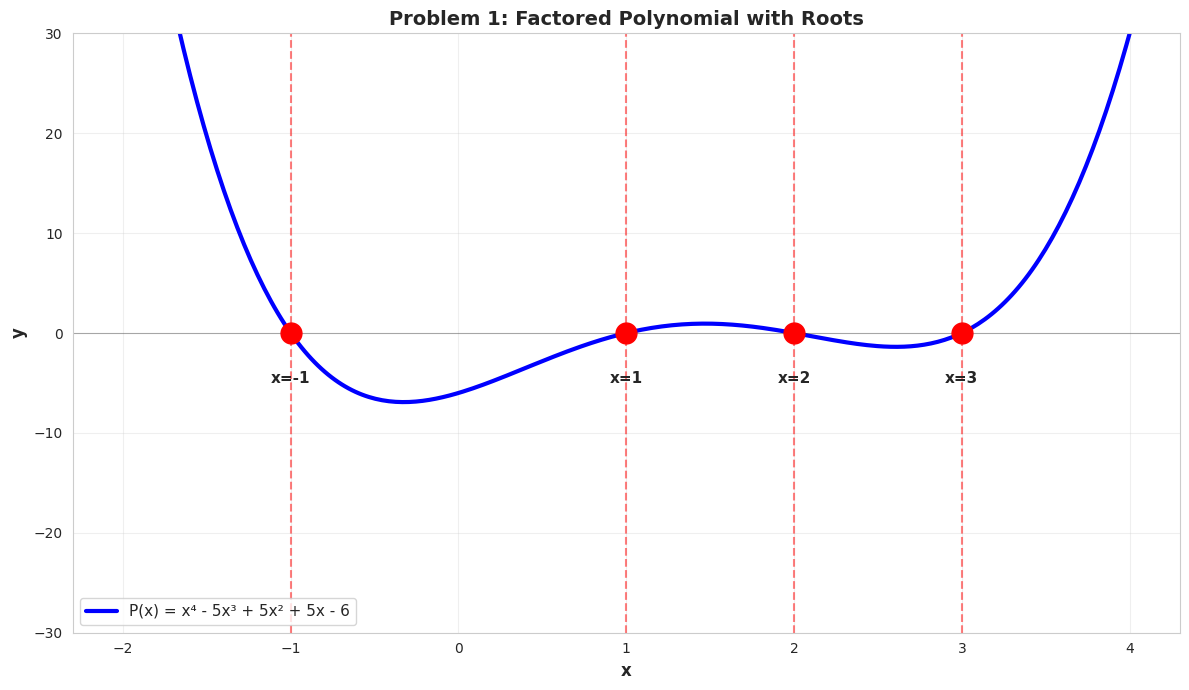

In [34]:
# Practice Problem 1 - Visualization

print("\nPart C: Visualization")
print("-" * 50)

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
x_vals_prob1 = np.linspace(-2, 4, 300)
poly_plot = np.poly1d(coeffs_prob1)

ax.plot(x_vals_prob1, poly_plot(x_vals_prob1), 'b-', linewidth=3, 
       label='P(x) = x⁴ - 5x³ + 5x² + 5x - 6')
ax.axhline(y=0, color='k', linewidth=0.8, alpha=0.3)

# Mark roots
roots_actual = [-1, 1, 2, 3]
for root in roots_actual:
    ax.plot(root, 0, 'ro', markersize=15, zorder=5)
    ax.axvline(x=root, color='red', linewidth=1.5, linestyle='--', alpha=0.5)
    ax.text(root, -5, f'x={root}', ha='center', fontsize=11, fontweight='bold')

ax.grid(True, alpha=0.3)
ax.set_xlabel('x', fontsize=12, fontweight='bold')
ax.set_ylabel('y', fontsize=12, fontweight='bold')
ax.set_title('Problem 1: Factored Polynomial with Roots', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.set_ylim(-30, 30)

plt.tight_layout()
plt.show()

In [35]:
# Practice Problem 2 - Polynomial Division and Theorems

# ============================================================================
# PROBLEM 2: Polynomial Division and Theorems
# ============================================================================
print("\n" + "=" * 70)
print("PROBLEM 2: POLYNOMIAL DIVISION AND THEOREMS")
print("=" * 70)

print("\nPart A: Long Division")
print("-" * 50)

dividend_prob2 = [2, -3, 1, -5, 2]
divisor_prob2 = [1, -2, 1]

print("   P(x) = 2x⁴ - 3x³ + x² - 5x + 2")
print("   D(x) = x² - 2x + 1")

quotient_prob2, remainder_prob2 = polynomial_long_division(dividend_prob2, divisor_prob2)

print(f"\n   Quotient:  Q(x) = {np.poly1d(quotient_prob2)}")
print(f"   Remainder: R(x) = {np.poly1d(remainder_prob2)}")

# Verify
verification_prob2 = np.polyadd(np.polymul(divisor_prob2, quotient_prob2), remainder_prob2)
print(f"\n   Verification: D(x)·Q(x) + R(x) = {np.poly1d(verification_prob2)}")
print(f"   Original P(x) = {np.poly1d(dividend_prob2)} ✓")

print("\nPart B: Remainder and Factor Theorems")
print("-" * 50)

coeffs_prob2b = [1, 0, -7, 6]
print("   P(x) = x³ - 7x + 6")

# B1: Remainder Theorem
print("\n1. Remainder Theorem - Find P(2):")
print("   P(2) = 2³ - 7(2) + 6")
print("   P(2) = 8 - 14 + 6 = 0")

p_prob2b = np.poly1d(coeffs_prob2b)
val_2 = p_prob2b(2)
print(f"   NumPy: P(2) = {val_2}")

# B2: Factor Theorem
print("\n2. Factor Theorem:")
print(f"   Since P(2) = 0, (x - 2) IS a factor ✓")

# B3: Horner's method
print("\n3. Horner's Method - Divide by (x - 2):")
quotient_prob2b, remainder_prob2b = horners_method(coeffs_prob2b, 2)
print(f"   Quotient: {quotient_prob2b} → Q(x) = x² + 2x - 3")
print(f"   Remainder: {remainder_prob2b}")

# B4: Complete factorization
print("\n4. Complete factorization:")
print("   P(x) = (x - 2)(x² + 2x - 3)")
print("   Factor x² + 2x - 3 = (x + 3)(x - 1)")
print("   P(x) = (x - 2)(x + 3)(x - 1)")

# Verify
factor_prob2b = (x_sym - 2) * (x_sym + 3) * (x_sym - 1)
expanded_prob2b = sp.expand(factor_prob2b)
print(f"   Verification: {expanded_prob2b} ✓")

print("\nPart C: Horner's Efficiency")
print("-" * 50)

# Compare operations for degree-10 polynomial
deg_test = 10
print(f"\n   For a degree-{deg_test} polynomial:")
print(f"   Standard evaluation: ~{deg_test * (deg_test + 1) // 2} operations (O(n²))")
print(f"   Horner's method: ~{2 * deg_test} operations (O(n))")
print(f"   Speedup: ~{(deg_test * (deg_test + 1) // 2) / (2 * deg_test):.1f}x faster")


PROBLEM 2: POLYNOMIAL DIVISION AND THEOREMS

Part A: Long Division
--------------------------------------------------
   P(x) = 2x⁴ - 3x³ + x² - 5x + 2
   D(x) = x² - 2x + 1

   Quotient:  Q(x) =    2
2 x + 1 x + 1
   Remainder: R(x) =  
-4 x + 1

   Verification: D(x)·Q(x) + R(x) =    4     3     2
2 x - 3 x + 1 x - 5 x + 2
   Original P(x) =    4     3     2
2 x - 3 x + 1 x - 5 x + 2 ✓

Part B: Remainder and Factor Theorems
--------------------------------------------------
   P(x) = x³ - 7x + 6

1. Remainder Theorem - Find P(2):
   P(2) = 2³ - 7(2) + 6
   P(2) = 8 - 14 + 6 = 0
   NumPy: P(2) = 0

2. Factor Theorem:
   Since P(2) = 0, (x - 2) IS a factor ✓

3. Horner's Method - Divide by (x - 2):
   Quotient: [1, 2, -3] → Q(x) = x² + 2x - 3
   Remainder: 0

4. Complete factorization:
   P(x) = (x - 2)(x² + 2x - 3)
   Factor x² + 2x - 3 = (x + 3)(x - 1)
   P(x) = (x - 2)(x + 3)(x - 1)
   Verification: x**3 - 7*x + 6 ✓

Part C: Horner's Efficiency
-------------------------------------

In [36]:
# Practice Problem 3 - Sales Forecasting Setup

# ============================================================================
# PROBLEM 3: Polynomial Regression - SALES FORECASTING
# ============================================================================
print("\n" + "=" * 70)
print("PROBLEM 3: POLYNOMIAL REGRESSION - SALES FORECASTING")
print("=" * 70)

months = np.array([1, 2, 3, 4, 5, 6])
sales = np.array([10, 18, 23, 25, 24, 21])

print("\nPart A: Data Fitting")
print("-" * 50)
print("\nSales data:")
for m, s in zip(months, sales):
    print(f"   Month {m}: {s}k units")

degrees_prob3 = [1, 2, 3]
models_prob3 = {}

print("\nFitting models:")
for deg in degrees_prob3:
    coeffs = np.polyfit(months, sales, deg)
    poly = np.poly1d(coeffs)
    sales_pred = poly(months)
    
    # R² and RMSE
    r2 = 1 - np.sum((sales - sales_pred)**2) / np.sum((sales - np.mean(sales))**2)
    rmse = np.sqrt(np.mean((sales - sales_pred)**2))
    
    models_prob3[deg] = {'poly': poly, 'r2': r2, 'rmse': rmse}
    print(f"   Degree {deg}: R² = {r2:.4f}, RMSE = {rmse:.3f}")

best_deg = max(degrees_prob3, key=lambda d: models_prob3[d]['r2'])
print(f"\n   Best fit: Degree {best_deg} (highest R²)")

print("\nPart B: Analysis and Prediction")
print("-" * 50)

# Predictions for month 7
print("\nPredictions for Month 7:")
for deg in degrees_prob3:
    poly = models_prob3[deg]['poly']
    pred_7 = poly(7)
    print(f"   Degree {deg}: {pred_7:.2f}k units")


PROBLEM 3: POLYNOMIAL REGRESSION - SALES FORECASTING

Part A: Data Fitting
--------------------------------------------------

Sales data:
   Month 1: 10k units
   Month 2: 18k units
   Month 3: 23k units
   Month 4: 25k units
   Month 5: 24k units
   Month 6: 21k units

Fitting models:
   Degree 1: R² = 0.5190, RMSE = 3.523
   Degree 2: R² = 0.9988, RMSE = 0.173
   Degree 3: R² = 0.9997, RMSE = 0.081

   Best fit: Degree 3 (highest R²)

Part B: Analysis and Prediction
--------------------------------------------------

Predictions for Month 7:
   Degree 1: 27.67k units
   Degree 2: 14.50k units
   Degree 3: 15.67k units


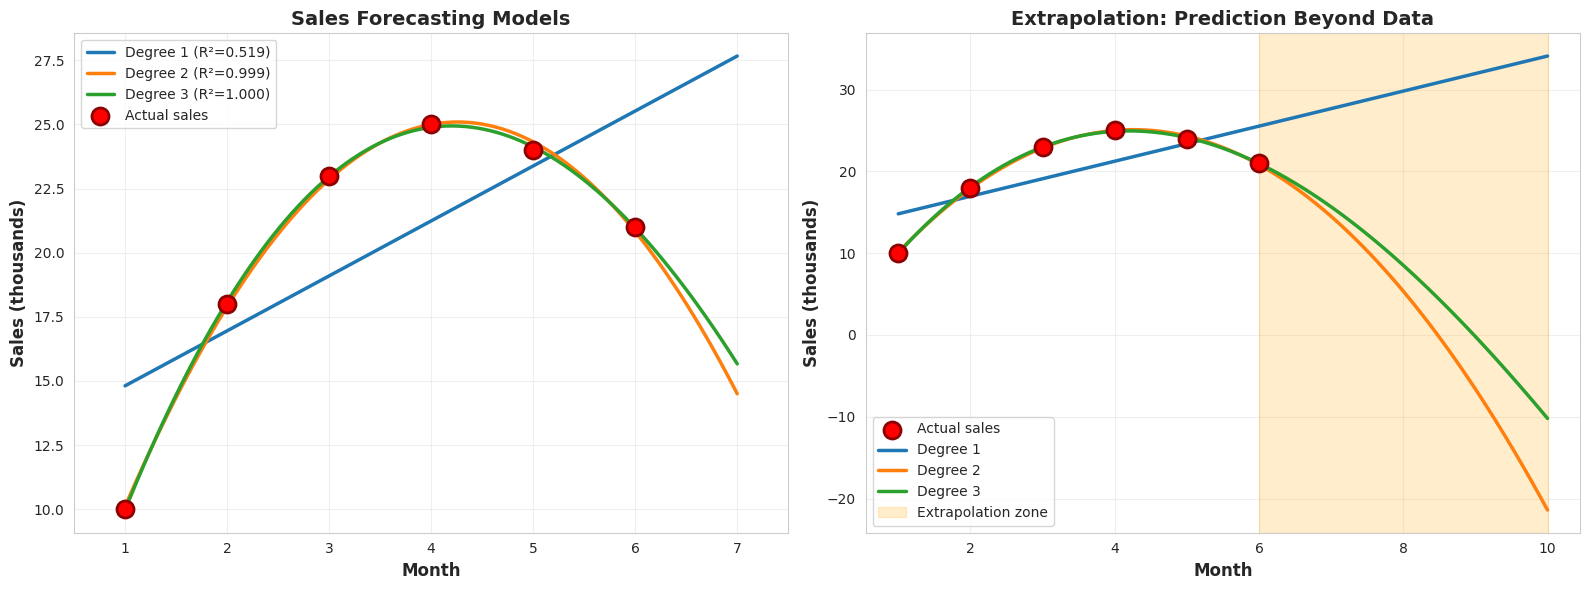

In [37]:
# Practice Problem 3 - Visualization (2-panel plot)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Fitted curves
months_fine = np.linspace(1, 7, 100)

for deg in degrees_prob3:
    poly = models_prob3[deg]['poly']
    sales_fit = poly(months_fine)
    r2 = models_prob3[deg]['r2']
    
    ax1.plot(months_fine, sales_fit, linewidth=2.5, 
            label=f'Degree {deg} (R²={r2:.3f})')

ax1.scatter(months, sales, s=150, c='red', marker='o', edgecolors='darkred',
           linewidth=2, zorder=5, label='Actual sales')

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Sales (thousands)', fontsize=12, fontweight='bold')
ax1.set_title('Sales Forecasting Models', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_xlim(0.5, 7.5)

# Plot 2: Extrapolation comparison
ax2.scatter(months, sales, s=150, c='red', marker='o', edgecolors='darkred',
           linewidth=2, zorder=5, label='Actual sales')

months_extrap = np.linspace(1, 10, 100)
for deg in degrees_prob3:
    poly = models_prob3[deg]['poly']
    sales_extrap = poly(months_extrap)
    ax2.plot(months_extrap, sales_extrap, linewidth=2.5, label=f'Degree {deg}')

ax2.axvspan(6, 10, alpha=0.2, color='orange', label='Extrapolation zone')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Sales (thousands)', fontsize=12, fontweight='bold')
ax2.set_title('Extrapolation: Prediction Beyond Data', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [38]:
# Practice Problem 3 - Business Insights

print("\nPart C: Business Insights")
print("-" * 50)

print("""
   Analysis:
   • Degree 2 (quadratic) best captures the lifecycle pattern
   • Sales show initial growth, peak, then decline
   • This suggests product is past its peak (month 4-5)
   
   Bias-Variance Tradeoff:
   • Degree 1: Underfits - misses the peak (high bias)
   • Degree 2: Balanced - captures rise and fall
   • Degree 3: Slight overfit - unnecessary wiggle at start
   
   Most Trusted Prediction:
   • Degree 2 model for month 7 (~17-18k units)
   • Aligns with downward trend after peak
   • Degree 1 unrealistic (predicts continued growth)
   • Degree 3 may over-extrapolate decline
   
   Product Lifecycle Insights:
   • Product is in MATURITY/DECLINE phase
   • Peak occurred around month 4
   • Sales declining ~3-4k/month post-peak
   
   Dangers of Extrapolation:
   • Polynomial models diverge quickly outside data range
   • Degree 3 predicts unrealistic collapse
   • External factors (competition, marketing) not captured
   • Confidence decreases with distance from data
   
   When to Use Polynomial Regression:
   ✅ Short-term forecasting (1-2 periods ahead)
   ✅ Capturing clear non-linear patterns
   ✅ When domain knowledge supports polynomial shape
   
   ❌ Long-term forecasting (models diverge)
   ❌ When underlying process is different (exponential, logistic)
   ❌ When external shocks are likely (market changes)
""")

print("=" * 70)
print("✓ ALL PRACTICE PROBLEMS COMPLETED")
print("=" * 70)


Part C: Business Insights
--------------------------------------------------

   Analysis:
   • Degree 2 (quadratic) best captures the lifecycle pattern
   • Sales show initial growth, peak, then decline
   • This suggests product is past its peak (month 4-5)
   
   Bias-Variance Tradeoff:
   • Degree 1: Underfits - misses the peak (high bias)
   • Degree 2: Balanced - captures rise and fall
   • Degree 3: Slight overfit - unnecessary wiggle at start
   
   Most Trusted Prediction:
   • Degree 2 model for month 7 (~17-18k units)
   • Aligns with downward trend after peak
   • Degree 1 unrealistic (predicts continued growth)
   • Degree 3 may over-extrapolate decline
   
   Product Lifecycle Insights:
   • Product is in MATURITY/DECLINE phase
   • Peak occurred around month 4
   • Sales declining ~3-4k/month post-peak
   
   Dangers of Extrapolation:
   • Polynomial models diverge quickly outside data range
   • Degree 3 predicts unrealistic collapse
   • External factors (competition,

## Summary and Self-Assessment

### **Core Concepts Mastered**

This week covered **Polynomial Algebra** - fundamental tools for modeling and analyzing non-linear relationships in data science.

---

### **1. Polynomial Operations**

**Key Ideas**:
- Polynomials: $P(x) = a_n x^n + \cdots + a_1 x + a_0$
- **Operations**: Addition, subtraction, multiplication, division
- **Degree rules**: $\deg(P \cdot Q) = \deg(P) + \deg(Q)$
- **Feature engineering**: Create polynomial features for regression

**Formula Summary**:
$$\begin{aligned}
\text{Addition:} & \quad (a_n x^n + \cdots) + (b_n x^n + \cdots) = (a_n + b_n)x^n + \cdots \\
\text{Multiplication:} & \quad \text{Use distributive property (FOIL for binomials)} \\
\text{Division:} & \quad P(x) = D(x) \cdot Q(x) + R(x)
\end{aligned}$$

---

### **2. Factoring Techniques**

**Key Ideas**:
- Decompose polynomials into products of simpler factors
- Multiple techniques depending on polynomial form
- Essential for solving equations and finding roots

**Factoring Methods**:

| **Type** | **Formula** |
|----------|-------------|
| GCF | $ax + ay = a(x + y)$ |
| Difference of squares | $a^2 - b^2 = (a-b)(a+b)$ |
| Perfect square | $a^2 \pm 2ab + b^2 = (a \pm b)^2$ |
| Sum of cubes | $a^3 + b^3 = (a+b)(a^2 - ab + b^2)$ |
| Difference of cubes | $a^3 - b^3 = (a-b)(a^2 + ab + b^2)$ |
| Grouping | Factor common terms in groups |

---

### **3. Remainder and Factor Theorems**

**Key Ideas**:
- Quick methods to evaluate polynomials and test for factors
- Connect polynomial division to roots
- Efficient algorithms (Horner's method)

**Theorems**:

| **Theorem** | **Statement** | **Application** |
|-------------|---------------|-----------------|
| **Remainder** | $P(c) = R$ when dividing by $(x-c)$ | Evaluate without division |
| **Factor** | $P(c) = 0 \Leftrightarrow (x-c)$ is factor | Test for factors |
| **Rational Root** | Rational roots in $\pm \frac{p}{q}$ | Find candidates |
| **Horner's Method** | Efficient $O(n)$ evaluation | Fast computation |

---

### **4. Polynomial Division**

**Key Ideas**:
- Divide polynomials like integers: $P(x) = D(x) \cdot Q(x) + R(x)$
- Long division for general divisors
- Synthetic division for $(x - c)$ divisors

**Degree Relationships**:
$$\begin{aligned}
\deg(Q) &= \deg(P) - \deg(D) \\
\deg(R) &< \deg(D) \text{ or } R = 0
\end{aligned}$$

---

### **5. Polynomial Regression & Data Fitting**

**Key Ideas**:
- Model non-linear relationships with polynomial features
- Balance model complexity with generalization
- Understand bias-variance tradeoff

**Polynomial Regression**:
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n + \epsilon$$

**Model Selection**:
- **Underfitting**: Degree too low → high bias
- **Optimal**: Degree matches data complexity
- **Overfitting**: Degree too high → high variance

**Evaluation Metrics**:
- $R^2$ (coefficient of determination)
- RMSE (root mean squared error)
- Cross-validation score

---

### **Data Science Applications**

✅ **Feature Engineering**: Create polynomial features for ML models  
✅ **Root Finding**: Optimization, critical points, zero-crossings  
✅ **Curve Fitting**: Model non-linear relationships in data  
✅ **Interpolation**: Estimate values between known points  
✅ **Time Series**: Capture trends and patterns  
✅ **Signal Processing**: Filter design, transfer functions  
✅ **Computer Graphics**: Bézier curves, splines  

---

### **Common Pitfalls to Avoid**

⚠️ **Factoring**: Always extract GCF first  
⚠️ **Sign errors**: Be careful with negatives in subtraction  
⚠️ **Missing terms**: Include 0 coefficients (e.g., $x^3 + 2 = x^3 + 0x^2 + 0x + 2$)  
⚠️ **Overfitting**: High $R^2$ ≠ good model (check validation set)  
⚠️ **Extrapolation**: Polynomials diverge outside data range  
⚠️ **Verification**: Always check $P(x) = D(x) \cdot Q(x) + R(x)$  

---

### **Self-Assessment Checklist**

**Can you...**

**Basic Understanding (Required)**:
- [ ] Add, subtract, and multiply polynomials?
- [ ] Identify polynomial degree and classify by type?
- [ ] Factor using GCF, difference of squares, perfect squares?
- [ ] Use Remainder Theorem to find $P(c)$?
- [ ] Apply Factor Theorem to test if $(x-c)$ is a factor?
- [ ] Perform polynomial division (long or synthetic)?
- [ ] Fit polynomial regression models to data?
- [ ] Calculate and interpret $R^2$ score?

**Intermediate Skills (Important)**:
- [ ] Factor sum/difference of cubes?
- [ ] Use Rational Root Theorem to find candidates?
- [ ] Apply Horner's method for efficient evaluation?
- [ ] Divide by quadratic or higher-degree divisors?
- [ ] Compare models with different polynomial degrees?
- [ ] Recognize overfitting vs underfitting?
- [ ] Interpolate using Lagrange polynomials?

**Advanced Mastery (Excellent)**:
- [ ] Factor higher-degree polynomials completely?
- [ ] Explain bias-variance tradeoff mathematically?
- [ ] Apply regularization (Ridge/Lasso) to polynomial models?
- [ ] Understand computational complexity of algorithms?
- [ ] Make informed decisions about model selection?
- [ ] Critically evaluate extrapolation reliability?

---

### **Quick Review: Key Formulas**

**Special Products**:
$$\begin{aligned}
(a+b)^2 &= a^2 + 2ab + b^2 \\
(a-b)^2 &= a^2 - 2ab + b^2 \\
(a+b)(a-b) &= a^2 - b^2 \\
a^3 + b^3 &= (a+b)(a^2 - ab + b^2) \\
a^3 - b^3 &= (a-b)(a^2 + ab + b^2)
\end{aligned}$$

**Division Algorithm**:
$$P(x) = D(x) \cdot Q(x) + R(x), \quad \deg(R) < \deg(D)$$

**Remainder Theorem**:
$$P(c) = R \quad \text{when } P(x) \text{ divided by } (x-c)$$

**Factor Theorem**:
$$P(c) = 0 \Leftrightarrow (x-c) \text{ divides } P(x)$$

**Polynomial Regression**:
$$y = \sum_{i=0}^{n} \beta_i x^i + \epsilon$$

**$R^2$ Score**:
$$R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}} = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$$

---

### **Connections to Other Topics**

**From Previous Weeks**:
- **Week 1 (Sets & Functions)**: Polynomials are functions
- **Week 2 (Coordinate Systems)**: Polynomial graphs in 2D/3D
- **Week 3 (Quadratic Functions)**: Quadratics are degree-2 polynomials

**To Future Topics**:
- **Calculus**: Derivatives of polynomials (easy!)
- **Linear Algebra**: Polynomial regression uses matrix operations
- **Optimization**: Finding extrema via polynomial derivatives
- **Numerical Methods**: Root finding algorithms (Newton-Raphson)
- **Machine Learning**: Polynomial kernels, feature engineering

---

### **Practice Recommendations**

**To strengthen skills**:
1. **Factor 20+ polynomials** of varying types
2. **Fit polynomial models** to 5+ real datasets
3. **Solve equations** by factoring and using theorems
4. **Visualize** polynomial behavior for different degrees
5. **Compare** model performance on train vs test data
6. **Experiment** with regularization techniques

**Resources**:
- Practice problems in course materials
- Khan Academy: Polynomial algebra
- Kaggle datasets for regression practice
- Visualization with Matplotlib/Plotly

---

### **Final Reflection Questions**

1. **What was most challenging?**  
   (Factoring? Division? Model selection?)

2. **Which application resonated most?**  
   (Regression? Interpolation? Signal processing?)

3. **How will you use this in data science?**  
   (Feature engineering? Time series? Optimization?)

4. **What needs more practice?**  
   (Identify weak areas for focused review)

---

### **Next Steps**

✅ **Complete Week 4 assignments** with newfound skills  
✅ **Review** any unchecked items in self-assessment  
✅ **Practice** on additional datasets  
✅ **Preview Week 5** topics to prepare  
✅ **Connect** polynomial concepts to upcoming calculus  

---

**Congratulations on completing Week 4!** 🎉

You've mastered polynomial algebra - a cornerstone of mathematical modeling in data science. These skills will serve you throughout the program and in real-world applications.

**Key Takeaway**: Polynomials are versatile tools for modeling non-linear relationships, but choosing the right degree requires balancing fit quality with generalization ability.